### Importing libraries

In [1]:
# import torch
# import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary
import albumentations as A
# from torchvision import datasets, transforms
import importlib
from utils import utils
from utils.dataset import Dataset
from utils.scheduler import Scheduler
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Initialize
utils.set_seed(1)

### Import dataset: CIFAR10

In [8]:
dataset = Dataset('CIFAR10')

Files already downloaded and verified
Files already downloaded and verified
The mean and SD for CIFAR10 dataset are [0.49139968 0.48215841 0.44653091] and [0.24703223 0.24348513 0.26158784] respectively.
Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader, test_loader = dataset.get_data_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

### Visualize input images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

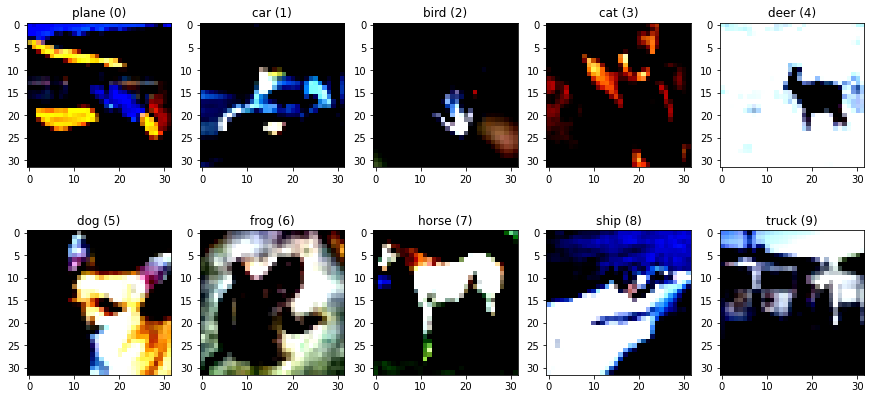

In [6]:
label_mapper = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# images, labels = next(dataiter)
utils.visualize_images(images, labels, label_mapper, n_cols=5, figsize=(15, 7))

### Model Training

#### Model 1

In [7]:
from models import model_1
importlib.reload(model_1)

<module 'models.model_1' from 'd:\\Self Learning\\TSAI\\TSAI\\S9\\models\\model_1.py'>

In [8]:
from models.model_1 import Net_1
device = utils.get_device()
in_ch = 3
model_1 = Net_1(in_ch=in_ch).to(device)
summary(model_1, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
       BatchNorm2d-6           [-1, 16, 32, 32]              32
              ReLU-7           [-1, 16, 32, 32]               0
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 16, 15, 15]           2,304
      BatchNorm2d-10           [-1, 16, 15, 15]              32
             ReLU-11           [-1, 16, 15, 15]               0
          Dropout-12           [-1, 16, 15, 15]               0
           Conv2d-13           [-1, 16, 15, 15]           2,304
      BatchNorm2d-14           [-1, 16,

In [9]:
num_epochs = 50
train_loader, test_loader = dataset.get_data_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_1.model_train(device, train_loader, criterion, optimizer)
    model_1.model_test(device, test_loader, criterion)

Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Train: Loss=1.469436526298523 Batch_id=390 Accuracy=33.24: 100%|██████████| 391/391 [00:37<00:00, 10.37it/s] 


Test: Average loss: 1.5272, Accuracy: 4284/10000 (42.84%), Accuracy Diff: 9.604

EPOCH: 2


Train: Loss=1.1872951984405518 Batch_id=390 Accuracy=51.59: 100%|██████████| 391/391 [00:35<00:00, 11.10it/s]


Test: Average loss: 1.1634, Accuracy: 5793/10000 (57.93%), Accuracy Diff: 6.342

EPOCH: 3


Train: Loss=1.2784898281097412 Batch_id=390 Accuracy=59.15: 100%|██████████| 391/391 [00:35<00:00, 11.11it/s]


Test: Average loss: 1.0860, Accuracy: 6182/10000 (61.82%), Accuracy Diff: 2.674

EPOCH: 4


Train: Loss=0.8825785517692566 Batch_id=390 Accuracy=63.47: 100%|██████████| 391/391 [00:34<00:00, 11.28it/s]


Test: Average loss: 0.9875, Accuracy: 6508/10000 (65.08%), Accuracy Diff: 1.61

EPOCH: 5


Train: Loss=1.0000569820404053 Batch_id=390 Accuracy=66.08: 100%|██████████| 391/391 [00:34<00:00, 11.34it/s]


Test: Average loss: 0.9044, Accuracy: 6802/10000 (68.02%), Accuracy Diff: 1.938

EPOCH: 6


Train: Loss=0.8178918957710266 Batch_id=390 Accuracy=68.33: 100%|██████████| 391/391 [00:40<00:00,  9.61it/s]


Test: Average loss: 0.8662, Accuracy: 6901/10000 (69.01%), Accuracy Diff: 0.684

EPOCH: 7


Train: Loss=0.7819945216178894 Batch_id=390 Accuracy=70.27: 100%|██████████| 391/391 [00:38<00:00, 10.05it/s]


Test: Average loss: 0.8104, Accuracy: 7132/10000 (71.32%), Accuracy Diff: 1.05

EPOCH: 8


Train: Loss=0.9850671887397766 Batch_id=390 Accuracy=71.65: 100%|██████████| 391/391 [00:39<00:00,  9.95it/s]


Test: Average loss: 0.7611, Accuracy: 7312/10000 (73.12%), Accuracy Diff: 1.466

EPOCH: 9


Train: Loss=0.6895517110824585 Batch_id=390 Accuracy=72.67: 100%|██████████| 391/391 [00:38<00:00, 10.18it/s]


Test: Average loss: 0.8079, Accuracy: 7175/10000 (71.75%), Accuracy Diff: 0.924

EPOCH: 10


Train: Loss=0.6747092008590698 Batch_id=390 Accuracy=73.89: 100%|██████████| 391/391 [00:39<00:00,  9.79it/s]


Test: Average loss: 0.7296, Accuracy: 7450/10000 (74.50%), Accuracy Diff: 0.61

EPOCH: 11


Train: Loss=0.7895376086235046 Batch_id=390 Accuracy=74.89: 100%|██████████| 391/391 [00:38<00:00, 10.09it/s]


Test: Average loss: 0.7377, Accuracy: 7452/10000 (74.52%), Accuracy Diff: 0.368

EPOCH: 12


Train: Loss=0.8680070638656616 Batch_id=390 Accuracy=75.24: 100%|██████████| 391/391 [00:40<00:00,  9.54it/s] 


Test: Average loss: 0.7044, Accuracy: 7602/10000 (76.02%), Accuracy Diff: 0.782

EPOCH: 13


Train: Loss=1.0001134872436523 Batch_id=390 Accuracy=75.83: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s] 


Test: Average loss: 0.6899, Accuracy: 7625/10000 (76.25%), Accuracy Diff: 0.416

EPOCH: 14


Train: Loss=0.6943550109863281 Batch_id=390 Accuracy=76.42: 100%|██████████| 391/391 [00:38<00:00, 10.08it/s] 


Test: Average loss: 0.6649, Accuracy: 7682/10000 (76.82%), Accuracy Diff: 0.396

EPOCH: 15


Train: Loss=0.6308586001396179 Batch_id=390 Accuracy=77.21: 100%|██████████| 391/391 [00:37<00:00, 10.41it/s] 


Test: Average loss: 0.6959, Accuracy: 7591/10000 (75.91%), Accuracy Diff: 1.302

EPOCH: 16


Train: Loss=0.515795111656189 Batch_id=390 Accuracy=77.88: 100%|██████████| 391/391 [00:36<00:00, 10.59it/s]  


Test: Average loss: 0.6662, Accuracy: 7689/10000 (76.89%), Accuracy Diff: 0.99

EPOCH: 17


Train: Loss=0.8174678087234497 Batch_id=390 Accuracy=78.12: 100%|██████████| 391/391 [00:37<00:00, 10.37it/s] 


Test: Average loss: 0.6510, Accuracy: 7749/10000 (77.49%), Accuracy Diff: 0.626

EPOCH: 18


Train: Loss=0.5647420883178711 Batch_id=390 Accuracy=78.39: 100%|██████████| 391/391 [00:37<00:00, 10.54it/s] 


Test: Average loss: 0.6383, Accuracy: 7824/10000 (78.24%), Accuracy Diff: 0.152

EPOCH: 19


Train: Loss=0.5880403518676758 Batch_id=390 Accuracy=78.99: 100%|██████████| 391/391 [00:39<00:00,  9.85it/s] 


Test: Average loss: 0.6470, Accuracy: 7775/10000 (77.75%), Accuracy Diff: 1.24

EPOCH: 20


Train: Loss=0.7178770303726196 Batch_id=390 Accuracy=79.05: 100%|██████████| 391/391 [00:38<00:00, 10.28it/s] 


Test: Average loss: 0.6257, Accuracy: 7878/10000 (78.78%), Accuracy Diff: 0.27

EPOCH: 21


Train: Loss=0.657108724117279 Batch_id=390 Accuracy=79.52: 100%|██████████| 391/391 [00:38<00:00, 10.18it/s]  


Test: Average loss: 0.6528, Accuracy: 7748/10000 (77.48%), Accuracy Diff: 2.042

EPOCH: 22


Train: Loss=0.6007680892944336 Batch_id=390 Accuracy=79.72: 100%|██████████| 391/391 [00:38<00:00, 10.20it/s] 


Test: Average loss: 0.6178, Accuracy: 7897/10000 (78.97%), Accuracy Diff: 0.752

EPOCH: 23


Train: Loss=0.728413999080658 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:39<00:00,  9.89it/s]  


Test: Average loss: 0.6274, Accuracy: 7857/10000 (78.57%), Accuracy Diff: 1.446

EPOCH: 24


Train: Loss=0.5124494433403015 Batch_id=390 Accuracy=80.05: 100%|██████████| 391/391 [00:38<00:00, 10.10it/s] 


Test: Average loss: 0.6415, Accuracy: 7846/10000 (78.46%), Accuracy Diff: 1.594

EPOCH: 25


Train: Loss=0.6200650930404663 Batch_id=390 Accuracy=80.69: 100%|██████████| 391/391 [00:37<00:00, 10.50it/s] 


Test: Average loss: 0.6191, Accuracy: 7898/10000 (78.98%), Accuracy Diff: 1.706

EPOCH: 26


Train: Loss=0.6770954132080078 Batch_id=390 Accuracy=80.70: 100%|██████████| 391/391 [00:36<00:00, 10.58it/s] 


Test: Average loss: 0.5977, Accuracy: 7958/10000 (79.58%), Accuracy Diff: 1.122

EPOCH: 27


Train: Loss=0.6836645007133484 Batch_id=390 Accuracy=81.17: 100%|██████████| 391/391 [00:37<00:00, 10.56it/s] 


Test: Average loss: 0.6324, Accuracy: 7843/10000 (78.43%), Accuracy Diff: 2.742

EPOCH: 28


Train: Loss=0.5676755905151367 Batch_id=390 Accuracy=80.81: 100%|██████████| 391/391 [00:37<00:00, 10.57it/s] 


Test: Average loss: 0.5870, Accuracy: 7970/10000 (79.70%), Accuracy Diff: 1.114

EPOCH: 29


Train: Loss=0.7595564126968384 Batch_id=390 Accuracy=81.23: 100%|██████████| 391/391 [00:38<00:00, 10.03it/s] 


Test: Average loss: 0.5931, Accuracy: 7989/10000 (79.89%), Accuracy Diff: 1.336

EPOCH: 30


Train: Loss=0.7898573875427246 Batch_id=390 Accuracy=81.68: 100%|██████████| 391/391 [00:37<00:00, 10.36it/s] 


Test: Average loss: 0.5993, Accuracy: 7964/10000 (79.64%), Accuracy Diff: 2.04

EPOCH: 31


Train: Loss=0.4419170916080475 Batch_id=390 Accuracy=81.59: 100%|██████████| 391/391 [00:42<00:00,  9.28it/s] 


Test: Average loss: 0.5965, Accuracy: 7978/10000 (79.78%), Accuracy Diff: 1.808

EPOCH: 32


Train: Loss=0.47222262620925903 Batch_id=390 Accuracy=81.59: 100%|██████████| 391/391 [00:37<00:00, 10.45it/s]


Test: Average loss: 0.5920, Accuracy: 8019/10000 (80.19%), Accuracy Diff: 1.404

EPOCH: 33


Train: Loss=0.4343319535255432 Batch_id=390 Accuracy=81.86: 100%|██████████| 391/391 [00:37<00:00, 10.44it/s] 


Test: Average loss: 0.5865, Accuracy: 8055/10000 (80.55%), Accuracy Diff: 1.308

EPOCH: 34


Train: Loss=0.5115524530410767 Batch_id=390 Accuracy=82.02: 100%|██████████| 391/391 [00:37<00:00, 10.49it/s] 


Test: Average loss: 0.6013, Accuracy: 7973/10000 (79.73%), Accuracy Diff: 2.292

EPOCH: 35


Train: Loss=0.4155535101890564 Batch_id=390 Accuracy=82.48: 100%|██████████| 391/391 [00:37<00:00, 10.51it/s] 


Test: Average loss: 0.6008, Accuracy: 7945/10000 (79.45%), Accuracy Diff: 3.032

EPOCH: 36


Train: Loss=0.6156010031700134 Batch_id=390 Accuracy=82.38: 100%|██████████| 391/391 [00:37<00:00, 10.56it/s] 


Test: Average loss: 0.5856, Accuracy: 8020/10000 (80.20%), Accuracy Diff: 2.176

EPOCH: 37


Train: Loss=0.3800743520259857 Batch_id=390 Accuracy=82.35: 100%|██████████| 391/391 [00:37<00:00, 10.55it/s] 


Test: Average loss: 0.5869, Accuracy: 8008/10000 (80.08%), Accuracy Diff: 2.274

EPOCH: 38


Train: Loss=0.43321338295936584 Batch_id=390 Accuracy=82.41: 100%|██████████| 391/391 [00:37<00:00, 10.50it/s]


Test: Average loss: 0.6044, Accuracy: 7950/10000 (79.50%), Accuracy Diff: 2.91

EPOCH: 39


Train: Loss=0.4011763036251068 Batch_id=390 Accuracy=82.75: 100%|██████████| 391/391 [00:37<00:00, 10.47it/s] 


Test: Average loss: 0.5940, Accuracy: 7985/10000 (79.85%), Accuracy Diff: 2.898

EPOCH: 40


Train: Loss=0.41097021102905273 Batch_id=390 Accuracy=82.80: 100%|██████████| 391/391 [00:37<00:00, 10.31it/s]


Test: Average loss: 0.5727, Accuracy: 8067/10000 (80.67%), Accuracy Diff: 2.128

EPOCH: 41


Train: Loss=0.663318395614624 Batch_id=390 Accuracy=83.08: 100%|██████████| 391/391 [00:38<00:00, 10.27it/s]  


Test: Average loss: 0.5911, Accuracy: 8021/10000 (80.21%), Accuracy Diff: 2.866

EPOCH: 42


Train: Loss=0.7138891220092773 Batch_id=390 Accuracy=83.13: 100%|██████████| 391/391 [00:37<00:00, 10.40it/s] 


Test: Average loss: 0.5882, Accuracy: 8029/10000 (80.29%), Accuracy Diff: 2.838

EPOCH: 43


Train: Loss=0.45903700590133667 Batch_id=390 Accuracy=83.27: 100%|██████████| 391/391 [00:37<00:00, 10.43it/s]


Test: Average loss: 0.5781, Accuracy: 8053/10000 (80.53%), Accuracy Diff: 2.74

EPOCH: 44


Train: Loss=0.517621636390686 Batch_id=390 Accuracy=83.15: 100%|██████████| 391/391 [00:37<00:00, 10.51it/s]  


Test: Average loss: 0.5695, Accuracy: 8065/10000 (80.65%), Accuracy Diff: 2.498

EPOCH: 45


Train: Loss=0.5300354957580566 Batch_id=390 Accuracy=83.43: 100%|██████████| 391/391 [00:37<00:00, 10.52it/s] 


Test: Average loss: 0.5913, Accuracy: 8022/10000 (80.22%), Accuracy Diff: 3.206

EPOCH: 46


Train: Loss=0.43645399808883667 Batch_id=390 Accuracy=83.59: 100%|██████████| 391/391 [00:39<00:00,  9.98it/s]


Test: Average loss: 0.5809, Accuracy: 8051/10000 (80.51%), Accuracy Diff: 3.082

EPOCH: 47


Train: Loss=0.5465438365936279 Batch_id=390 Accuracy=83.54: 100%|██████████| 391/391 [00:37<00:00, 10.34it/s] 


Test: Average loss: 0.5665, Accuracy: 8123/10000 (81.23%), Accuracy Diff: 2.308

EPOCH: 48


Train: Loss=0.36328211426734924 Batch_id=390 Accuracy=83.56: 100%|██████████| 391/391 [00:37<00:00, 10.43it/s]


Test: Average loss: 0.5794, Accuracy: 8045/10000 (80.45%), Accuracy Diff: 3.108

EPOCH: 49


Train: Loss=0.35783904790878296 Batch_id=390 Accuracy=83.87: 100%|██████████| 391/391 [00:37<00:00, 10.43it/s]


Test: Average loss: 0.5812, Accuracy: 8037/10000 (80.37%), Accuracy Diff: 3.502

EPOCH: 50


Train: Loss=0.3627055883407593 Batch_id=390 Accuracy=83.93: 100%|██████████| 391/391 [00:37<00:00, 10.56it/s] 


Test: Average loss: 0.5711, Accuracy: 8064/10000 (80.64%), Accuracy Diff: 3.294



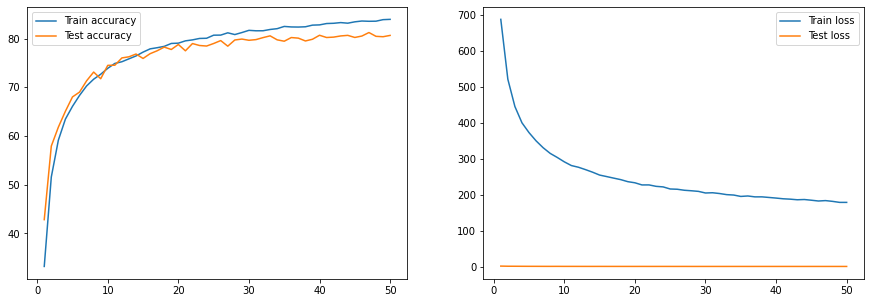

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_1.plot_accuracy()
plt.subplot(122)
model_1.plot_loss()
# plt.savefig('images/model_1.png')
plt.show()

In [13]:
max(model_1.train_accuracy), max(model_1.test_accuracy)

(83.934, 81.23)

#### Model 2

In [6]:
from models import model_2
importlib.reload(model_2)

<module 'models.model_2' from 'd:\\Self Learning\\TSAI\\TSAI\\S9\\models\\model_2.py'>

In [7]:
from models.model_2 import Net_2
device = utils.get_device()
in_ch = 3
model_2 = Net_2(in_ch=in_ch).to(device)
summary(model_2, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
       BatchNorm2d-6           [-1, 16, 32, 32]              32
              ReLU-7           [-1, 16, 32, 32]               0
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 16, 15, 15]           2,304
      BatchNorm2d-10           [-1, 16, 15, 15]              32
             ReLU-11           [-1, 16, 15, 15]               0
          Dropout-12           [-1, 16, 15, 15]               0
           Conv2d-13           [-1, 16, 15, 15]           2,304
      BatchNorm2d-14           [-1, 16,

In [8]:
num_epochs = 50
train_loader, test_loader = dataset.get_data_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_2.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_2.model_train(device, train_loader, criterion, optimizer)
    model_2.model_test(device, test_loader, criterion)

Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Train: Loss=1.3517110347747803 Batch_id=390 Accuracy=35.62: 100%|██████████| 391/391 [00:22<00:00, 17.12it/s]


Test: Average loss: 1.4484, Accuracy: 4640/10000 (46.40%), Accuracy Diff: 10.778

EPOCH: 2


Train: Loss=1.105089783668518 Batch_id=390 Accuracy=53.03: 100%|██████████| 391/391 [00:20<00:00, 19.21it/s] 


Test: Average loss: 1.2586, Accuracy: 5495/10000 (54.95%), Accuracy Diff: 1.922

EPOCH: 3


Train: Loss=1.2479796409606934 Batch_id=390 Accuracy=59.49: 100%|██████████| 391/391 [00:18<00:00, 21.32it/s]


Test: Average loss: 1.0439, Accuracy: 6270/10000 (62.70%), Accuracy Diff: 3.206

EPOCH: 4


Train: Loss=0.941815972328186 Batch_id=390 Accuracy=63.94: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s] 


Test: Average loss: 1.0022, Accuracy: 6483/10000 (64.83%), Accuracy Diff: 0.888

EPOCH: 5


Train: Loss=0.8446148633956909 Batch_id=390 Accuracy=66.61: 100%|██████████| 391/391 [00:22<00:00, 17.64it/s]


Test: Average loss: 0.8939, Accuracy: 6837/10000 (68.37%), Accuracy Diff: 1.764

EPOCH: 6


Train: Loss=0.9526695013046265 Batch_id=390 Accuracy=69.08: 100%|██████████| 391/391 [00:34<00:00, 11.34it/s]


Test: Average loss: 0.9197, Accuracy: 6700/10000 (67.00%), Accuracy Diff: 2.08

EPOCH: 7


Train: Loss=0.6474393606185913 Batch_id=390 Accuracy=70.76: 100%|██████████| 391/391 [00:34<00:00, 11.26it/s]


Test: Average loss: 0.7807, Accuracy: 7297/10000 (72.97%), Accuracy Diff: 2.214

EPOCH: 8


Train: Loss=0.8912056088447571 Batch_id=390 Accuracy=72.20: 100%|██████████| 391/391 [00:49<00:00,  7.93it/s]


Test: Average loss: 0.8039, Accuracy: 7203/10000 (72.03%), Accuracy Diff: 0.172

EPOCH: 9


Train: Loss=0.6937827467918396 Batch_id=390 Accuracy=73.35: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]


Test: Average loss: 0.7478, Accuracy: 7386/10000 (73.86%), Accuracy Diff: 0.506

EPOCH: 10


Train: Loss=0.7289870977401733 Batch_id=390 Accuracy=74.37: 100%|██████████| 391/391 [00:45<00:00,  8.56it/s]


Test: Average loss: 0.7470, Accuracy: 7389/10000 (73.89%), Accuracy Diff: 0.482

EPOCH: 11


Train: Loss=0.640914797782898 Batch_id=390 Accuracy=74.95: 100%|██████████| 391/391 [00:39<00:00,  9.92it/s] 


Test: Average loss: 0.7741, Accuracy: 7320/10000 (73.20%), Accuracy Diff: 1.75

EPOCH: 12


Train: Loss=0.6677778363227844 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:38<00:00, 10.15it/s]


Test: Average loss: 0.7526, Accuracy: 7376/10000 (73.76%), Accuracy Diff: 2.19

EPOCH: 13


Train: Loss=0.7921226024627686 Batch_id=390 Accuracy=76.76: 100%|██████████| 391/391 [00:39<00:00,  9.93it/s] 


Test: Average loss: 0.7618, Accuracy: 7344/10000 (73.44%), Accuracy Diff: 3.316

EPOCH: 14


Train: Loss=0.7104867100715637 Batch_id=390 Accuracy=77.12: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s] 


Test: Average loss: 0.6695, Accuracy: 7682/10000 (76.82%), Accuracy Diff: 0.298

EPOCH: 15


Train: Loss=0.6898916959762573 Batch_id=390 Accuracy=77.59: 100%|██████████| 391/391 [00:42<00:00,  9.23it/s] 


Test: Average loss: 0.6810, Accuracy: 7681/10000 (76.81%), Accuracy Diff: 0.784

EPOCH: 16


Train: Loss=0.5582114458084106 Batch_id=390 Accuracy=78.05: 100%|██████████| 391/391 [00:40<00:00,  9.75it/s] 


Test: Average loss: 0.6703, Accuracy: 7722/10000 (77.22%), Accuracy Diff: 0.83

EPOCH: 17


Train: Loss=0.5423787236213684 Batch_id=390 Accuracy=78.64: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s] 


Test: Average loss: 0.6855, Accuracy: 7626/10000 (76.26%), Accuracy Diff: 2.382

EPOCH: 18


Train: Loss=0.4889433979988098 Batch_id=390 Accuracy=79.01: 100%|██████████| 391/391 [00:39<00:00,  9.93it/s] 


Test: Average loss: 0.6471, Accuracy: 7789/10000 (77.89%), Accuracy Diff: 1.116

EPOCH: 19


Train: Loss=0.5935590267181396 Batch_id=390 Accuracy=79.34: 100%|██████████| 391/391 [00:39<00:00,  9.79it/s] 


Test: Average loss: 0.6519, Accuracy: 7757/10000 (77.57%), Accuracy Diff: 1.77

EPOCH: 20


Train: Loss=0.5573786497116089 Batch_id=390 Accuracy=79.74: 100%|██████████| 391/391 [00:40<00:00,  9.59it/s] 


Test: Average loss: 0.6413, Accuracy: 7767/10000 (77.67%), Accuracy Diff: 2.068

EPOCH: 21


Train: Loss=0.5955811738967896 Batch_id=390 Accuracy=79.72: 100%|██████████| 391/391 [00:43<00:00,  8.94it/s] 


Test: Average loss: 0.6823, Accuracy: 7699/10000 (76.99%), Accuracy Diff: 2.73

EPOCH: 22


Train: Loss=0.610531747341156 Batch_id=390 Accuracy=80.20: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]  


Test: Average loss: 0.6736, Accuracy: 7724/10000 (77.24%), Accuracy Diff: 2.96

EPOCH: 23


Train: Loss=0.7281289100646973 Batch_id=390 Accuracy=80.53: 100%|██████████| 391/391 [00:38<00:00, 10.11it/s] 


Test: Average loss: 0.6678, Accuracy: 7732/10000 (77.32%), Accuracy Diff: 3.206

EPOCH: 24


Train: Loss=0.34684258699417114 Batch_id=390 Accuracy=80.80: 100%|██████████| 391/391 [00:39<00:00,  9.94it/s]


Test: Average loss: 0.6160, Accuracy: 7961/10000 (79.61%), Accuracy Diff: 1.19

EPOCH: 25


Train: Loss=0.7185987234115601 Batch_id=390 Accuracy=80.85: 100%|██████████| 391/391 [00:41<00:00,  9.39it/s] 


Test: Average loss: 0.6328, Accuracy: 7831/10000 (78.31%), Accuracy Diff: 2.536

EPOCH: 26


Train: Loss=0.5345051884651184 Batch_id=390 Accuracy=81.15: 100%|██████████| 391/391 [00:41<00:00,  9.38it/s] 


Test: Average loss: 0.6113, Accuracy: 7961/10000 (79.61%), Accuracy Diff: 1.538

EPOCH: 27


Train: Loss=0.6655519008636475 Batch_id=390 Accuracy=81.32: 100%|██████████| 391/391 [00:39<00:00,  9.93it/s] 


Test: Average loss: 0.6458, Accuracy: 7836/10000 (78.36%), Accuracy Diff: 2.964

EPOCH: 28


Train: Loss=0.5659664273262024 Batch_id=390 Accuracy=81.48: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s] 


Test: Average loss: 0.6154, Accuracy: 7908/10000 (79.08%), Accuracy Diff: 2.404

EPOCH: 29


Train: Loss=0.7310957312583923 Batch_id=390 Accuracy=81.90: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s] 


Test: Average loss: 0.6379, Accuracy: 7824/10000 (78.24%), Accuracy Diff: 3.664

EPOCH: 30


Train: Loss=0.7477431893348694 Batch_id=390 Accuracy=82.09: 100%|██████████| 391/391 [00:40<00:00,  9.58it/s] 


Test: Average loss: 0.6230, Accuracy: 7934/10000 (79.34%), Accuracy Diff: 2.75

EPOCH: 31


Train: Loss=0.41982126235961914 Batch_id=390 Accuracy=82.09: 100%|██████████| 391/391 [00:42<00:00,  9.17it/s]


Test: Average loss: 0.6278, Accuracy: 7886/10000 (78.86%), Accuracy Diff: 3.228

EPOCH: 32


Train: Loss=0.5347832441329956 Batch_id=390 Accuracy=82.53: 100%|██████████| 391/391 [00:38<00:00, 10.16it/s] 


Test: Average loss: 0.6221, Accuracy: 7894/10000 (78.94%), Accuracy Diff: 3.586

EPOCH: 33


Train: Loss=0.5947023630142212 Batch_id=390 Accuracy=82.48: 100%|██████████| 391/391 [00:38<00:00, 10.15it/s] 


Test: Average loss: 0.6042, Accuracy: 7968/10000 (79.68%), Accuracy Diff: 2.796

EPOCH: 34


Train: Loss=0.6731317639350891 Batch_id=390 Accuracy=82.62: 100%|██████████| 391/391 [00:38<00:00, 10.20it/s] 


Test: Average loss: 0.6254, Accuracy: 7903/10000 (79.03%), Accuracy Diff: 3.588

EPOCH: 35


Train: Loss=0.5899671912193298 Batch_id=390 Accuracy=82.88: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s] 


Test: Average loss: 0.6105, Accuracy: 7946/10000 (79.46%), Accuracy Diff: 3.416

EPOCH: 36


Train: Loss=0.6932920813560486 Batch_id=390 Accuracy=82.92: 100%|██████████| 391/391 [00:40<00:00,  9.62it/s] 


Test: Average loss: 0.6112, Accuracy: 7935/10000 (79.35%), Accuracy Diff: 3.574

EPOCH: 37


Train: Loss=0.5288597345352173 Batch_id=390 Accuracy=83.03: 100%|██████████| 391/391 [00:38<00:00, 10.10it/s] 


Test: Average loss: 0.6039, Accuracy: 8001/10000 (80.01%), Accuracy Diff: 3.02

EPOCH: 38


Train: Loss=0.4711504876613617 Batch_id=390 Accuracy=83.07: 100%|██████████| 391/391 [00:38<00:00, 10.07it/s] 


Test: Average loss: 0.6196, Accuracy: 7925/10000 (79.25%), Accuracy Diff: 3.818

EPOCH: 39


Train: Loss=0.4610041081905365 Batch_id=390 Accuracy=83.11: 100%|██████████| 391/391 [00:38<00:00, 10.18it/s] 


Test: Average loss: 0.6148, Accuracy: 7947/10000 (79.47%), Accuracy Diff: 3.636

EPOCH: 40


Train: Loss=0.5891521573066711 Batch_id=390 Accuracy=83.60: 100%|██████████| 391/391 [00:38<00:00, 10.03it/s] 


Test: Average loss: 0.6096, Accuracy: 7981/10000 (79.81%), Accuracy Diff: 3.786

EPOCH: 41


Train: Loss=0.5370162725448608 Batch_id=390 Accuracy=83.53: 100%|██████████| 391/391 [00:38<00:00, 10.10it/s] 


Test: Average loss: 0.6184, Accuracy: 8004/10000 (80.04%), Accuracy Diff: 3.494

EPOCH: 42


Train: Loss=0.6942568421363831 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [00:39<00:00,  9.98it/s] 


Test: Average loss: 0.6175, Accuracy: 7956/10000 (79.56%), Accuracy Diff: 4.194

EPOCH: 43


Train: Loss=0.4148213267326355 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [00:38<00:00, 10.12it/s] 


Test: Average loss: 0.6127, Accuracy: 7968/10000 (79.68%), Accuracy Diff: 4.066

EPOCH: 44


Train: Loss=0.4729789197444916 Batch_id=390 Accuracy=83.51: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s] 


Test: Average loss: 0.5975, Accuracy: 8024/10000 (80.24%), Accuracy Diff: 3.266

EPOCH: 45


Train: Loss=0.6472935080528259 Batch_id=390 Accuracy=83.72: 100%|██████████| 391/391 [00:41<00:00,  9.47it/s] 


Test: Average loss: 0.6220, Accuracy: 7963/10000 (79.63%), Accuracy Diff: 4.088

EPOCH: 46


Train: Loss=0.3248395025730133 Batch_id=390 Accuracy=83.98: 100%|██████████| 391/391 [00:41<00:00,  9.42it/s] 


Test: Average loss: 0.6191, Accuracy: 7948/10000 (79.48%), Accuracy Diff: 4.504

EPOCH: 47


Train: Loss=0.6513628959655762 Batch_id=390 Accuracy=84.07: 100%|██████████| 391/391 [00:41<00:00,  9.46it/s] 


Test: Average loss: 0.6038, Accuracy: 8000/10000 (80.00%), Accuracy Diff: 4.068

EPOCH: 48


Train: Loss=0.4756603240966797 Batch_id=390 Accuracy=84.15: 100%|██████████| 391/391 [00:38<00:00, 10.10it/s] 


Test: Average loss: 0.6213, Accuracy: 7951/10000 (79.51%), Accuracy Diff: 4.638

EPOCH: 49


Train: Loss=0.3405633568763733 Batch_id=390 Accuracy=84.43: 100%|██████████| 391/391 [00:38<00:00, 10.23it/s] 


Test: Average loss: 0.5951, Accuracy: 8072/10000 (80.72%), Accuracy Diff: 3.706

EPOCH: 50


Train: Loss=0.3672524690628052 Batch_id=390 Accuracy=84.45: 100%|██████████| 391/391 [00:38<00:00, 10.18it/s] 


Test: Average loss: 0.5902, Accuracy: 8051/10000 (80.51%), Accuracy Diff: 3.936



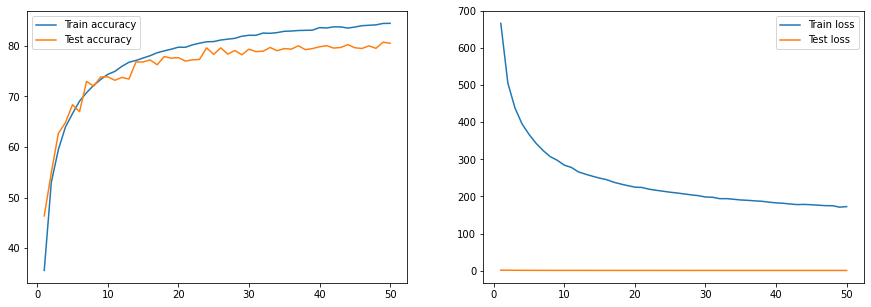

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_2.plot_accuracy()
plt.subplot(122)
model_2.plot_loss()
plt.savefig('images/model_2.png')
plt.show()

In [11]:
max(model_2.train_accuracy), max(model_2.test_accuracy)

(84.446, 80.72)

#### Model 3

In [6]:
from models import model_3
importlib.reload(model_3)

<module 'models.model_3' from 'd:\\Self Learning\\TSAI\\TSAI\\S9\\models\\model_3.py'>

In [7]:
from models.model_3 import Net_3
device = utils.get_device()
in_ch = 3
model_3 = Net_3(in_ch=in_ch).to(device)
summary(model_3, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]             144
            Conv2d-6           [-1, 16, 32, 32]             256
       BatchNorm2d-7           [-1, 16, 32, 32]              32
              ReLU-8           [-1, 16, 32, 32]               0
           Dropout-9           [-1, 16, 32, 32]               0
           Conv2d-10           [-1, 16, 15, 15]           2,304
      BatchNorm2d-11           [-1, 16, 15, 15]              32
             ReLU-12           [-1, 16, 15, 15]               0
          Dropout-13           [-1, 16, 15, 15]               0
           Conv2d-14           [-1, 16,

In [8]:
num_epochs = 50
train_loader, test_loader = dataset.get_data_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_3.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_3.model_train(device, train_loader, criterion, optimizer)
    model_3.model_test(device, test_loader, criterion)

Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Train: Loss=1.5702089071273804 Batch_id=390 Accuracy=35.88: 100%|██████████| 391/391 [00:40<00:00,  9.68it/s]


Test: Average loss: 1.5185, Accuracy: 4451/10000 (44.51%), Accuracy Diff: 8.628

EPOCH: 2


Train: Loss=1.3579461574554443 Batch_id=390 Accuracy=50.96: 100%|██████████| 391/391 [00:36<00:00, 10.79it/s]


Test: Average loss: 1.2152, Accuracy: 5555/10000 (55.55%), Accuracy Diff: 4.586

EPOCH: 3


Train: Loss=1.2093994617462158 Batch_id=390 Accuracy=57.77: 100%|██████████| 391/391 [00:37<00:00, 10.53it/s]


Test: Average loss: 1.1019, Accuracy: 6093/10000 (60.93%), Accuracy Diff: 3.164

EPOCH: 4


Train: Loss=0.9466352462768555 Batch_id=390 Accuracy=61.72: 100%|██████████| 391/391 [00:41<00:00,  9.53it/s]


Test: Average loss: 1.0083, Accuracy: 6351/10000 (63.51%), Accuracy Diff: 1.788

EPOCH: 5


Train: Loss=0.8686815500259399 Batch_id=390 Accuracy=64.63: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]


Test: Average loss: 0.9471, Accuracy: 6647/10000 (66.47%), Accuracy Diff: 1.844

EPOCH: 6


Train: Loss=0.9181272387504578 Batch_id=390 Accuracy=66.44: 100%|██████████| 391/391 [00:39<00:00,  9.99it/s]


Test: Average loss: 0.9152, Accuracy: 6763/10000 (67.63%), Accuracy Diff: 1.194

EPOCH: 7


Train: Loss=0.9034467935562134 Batch_id=390 Accuracy=68.17: 100%|██████████| 391/391 [00:39<00:00,  9.86it/s]


Test: Average loss: 0.9319, Accuracy: 6724/10000 (67.24%), Accuracy Diff: 0.928

EPOCH: 8


Train: Loss=0.9591056704521179 Batch_id=390 Accuracy=69.29: 100%|██████████| 391/391 [00:39<00:00,  9.96it/s]


Test: Average loss: 0.8416, Accuracy: 7018/10000 (70.18%), Accuracy Diff: 0.89

EPOCH: 9


Train: Loss=1.0324381589889526 Batch_id=390 Accuracy=70.62: 100%|██████████| 391/391 [00:50<00:00,  7.68it/s]


Test: Average loss: 0.8134, Accuracy: 7120/10000 (71.20%), Accuracy Diff: 0.582

EPOCH: 10


Train: Loss=0.6214908361434937 Batch_id=390 Accuracy=71.29: 100%|██████████| 391/391 [00:37<00:00, 10.33it/s]


Test: Average loss: 0.8036, Accuracy: 7153/10000 (71.53%), Accuracy Diff: 0.242

EPOCH: 11


Train: Loss=0.7736291885375977 Batch_id=390 Accuracy=72.07: 100%|██████████| 391/391 [00:37<00:00, 10.29it/s]


Test: Average loss: 0.7848, Accuracy: 7239/10000 (72.39%), Accuracy Diff: 0.322

EPOCH: 12


Train: Loss=0.790098249912262 Batch_id=390 Accuracy=72.98: 100%|██████████| 391/391 [00:36<00:00, 10.81it/s] 


Test: Average loss: 0.7788, Accuracy: 7269/10000 (72.69%), Accuracy Diff: 0.286

EPOCH: 13


Train: Loss=0.8355311155319214 Batch_id=390 Accuracy=73.88: 100%|██████████| 391/391 [00:35<00:00, 10.90it/s]


Test: Average loss: 0.7604, Accuracy: 7357/10000 (73.57%), Accuracy Diff: 0.314

EPOCH: 14


Train: Loss=1.1529254913330078 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]


Test: Average loss: 0.7370, Accuracy: 7421/10000 (74.21%), Accuracy Diff: 0.144

EPOCH: 15


Train: Loss=0.6795265674591064 Batch_id=390 Accuracy=74.73: 100%|██████████| 391/391 [00:42<00:00,  9.13it/s] 


Test: Average loss: 0.7189, Accuracy: 7460/10000 (74.60%), Accuracy Diff: 0.126

EPOCH: 16


Train: Loss=0.762076735496521 Batch_id=390 Accuracy=75.06: 100%|██████████| 391/391 [00:58<00:00,  6.66it/s] 


Test: Average loss: 0.7137, Accuracy: 7531/10000 (75.31%), Accuracy Diff: 0.252

EPOCH: 17


Train: Loss=0.7512602806091309 Batch_id=390 Accuracy=75.54: 100%|██████████| 391/391 [00:42<00:00,  9.21it/s] 


Test: Average loss: 0.7071, Accuracy: 7561/10000 (75.61%), Accuracy Diff: 0.066

EPOCH: 18


Train: Loss=0.6387757062911987 Batch_id=390 Accuracy=76.12: 100%|██████████| 391/391 [00:41<00:00,  9.36it/s] 


Test: Average loss: 0.7030, Accuracy: 7541/10000 (75.41%), Accuracy Diff: 0.712

EPOCH: 19


Train: Loss=0.8348623514175415 Batch_id=390 Accuracy=76.42: 100%|██████████| 391/391 [00:41<00:00,  9.45it/s] 


Test: Average loss: 0.6906, Accuracy: 7601/10000 (76.01%), Accuracy Diff: 0.412

EPOCH: 20


Train: Loss=0.7191754579544067 Batch_id=390 Accuracy=76.86: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s] 


Test: Average loss: 0.6872, Accuracy: 7624/10000 (76.24%), Accuracy Diff: 0.616

EPOCH: 21


Train: Loss=0.5525738000869751 Batch_id=390 Accuracy=77.41: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s] 


Test: Average loss: 0.6724, Accuracy: 7687/10000 (76.87%), Accuracy Diff: 0.542

EPOCH: 22


Train: Loss=0.5949414372444153 Batch_id=390 Accuracy=77.65: 100%|██████████| 391/391 [00:45<00:00,  8.64it/s] 


Test: Average loss: 0.6669, Accuracy: 7695/10000 (76.95%), Accuracy Diff: 0.7

EPOCH: 23


Train: Loss=0.5492354035377502 Batch_id=390 Accuracy=77.72: 100%|██████████| 391/391 [00:36<00:00, 10.58it/s] 


Test: Average loss: 0.6630, Accuracy: 7685/10000 (76.85%), Accuracy Diff: 0.872

EPOCH: 24


Train: Loss=0.6222601532936096 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:36<00:00, 10.63it/s] 


Test: Average loss: 0.6545, Accuracy: 7703/10000 (77.03%), Accuracy Diff: 1.002

EPOCH: 25


Train: Loss=0.5991916656494141 Batch_id=390 Accuracy=78.44: 100%|██████████| 391/391 [00:35<00:00, 10.93it/s] 


Test: Average loss: 0.6759, Accuracy: 7655/10000 (76.55%), Accuracy Diff: 1.888

EPOCH: 26


Train: Loss=0.5764099359512329 Batch_id=390 Accuracy=78.22: 100%|██████████| 391/391 [00:36<00:00, 10.69it/s] 


Test: Average loss: 0.6689, Accuracy: 7712/10000 (77.12%), Accuracy Diff: 1.102

EPOCH: 27


Train: Loss=0.5856041312217712 Batch_id=390 Accuracy=78.93: 100%|██████████| 391/391 [00:36<00:00, 10.73it/s] 


Test: Average loss: 0.6547, Accuracy: 7732/10000 (77.32%), Accuracy Diff: 1.608

EPOCH: 28


Train: Loss=0.619360089302063 Batch_id=390 Accuracy=78.93: 100%|██████████| 391/391 [00:36<00:00, 10.83it/s]  


Test: Average loss: 0.6724, Accuracy: 7692/10000 (76.92%), Accuracy Diff: 2.012

EPOCH: 29


Train: Loss=0.5235785245895386 Batch_id=390 Accuracy=79.16: 100%|██████████| 391/391 [00:38<00:00, 10.16it/s] 


Test: Average loss: 0.6409, Accuracy: 7820/10000 (78.20%), Accuracy Diff: 0.96

EPOCH: 30


Train: Loss=0.5071843266487122 Batch_id=390 Accuracy=79.14: 100%|██████████| 391/391 [00:36<00:00, 10.66it/s] 


Test: Average loss: 0.6526, Accuracy: 7752/10000 (77.52%), Accuracy Diff: 1.622

EPOCH: 31


Train: Loss=0.5628693103790283 Batch_id=390 Accuracy=79.37: 100%|██████████| 391/391 [00:36<00:00, 10.69it/s] 


Test: Average loss: 0.6487, Accuracy: 7754/10000 (77.54%), Accuracy Diff: 1.834

EPOCH: 32


Train: Loss=0.5740834474563599 Batch_id=390 Accuracy=79.76: 100%|██████████| 391/391 [00:40<00:00,  9.57it/s] 


Test: Average loss: 0.6386, Accuracy: 7853/10000 (78.53%), Accuracy Diff: 1.23

EPOCH: 33


Train: Loss=0.8758479952812195 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:35<00:00, 11.01it/s] 


Test: Average loss: 0.6399, Accuracy: 7817/10000 (78.17%), Accuracy Diff: 1.66

EPOCH: 34


Train: Loss=0.5246850252151489 Batch_id=390 Accuracy=79.92: 100%|██████████| 391/391 [00:42<00:00,  9.11it/s] 


Test: Average loss: 0.6298, Accuracy: 7873/10000 (78.73%), Accuracy Diff: 1.194

EPOCH: 35


Train: Loss=0.5932406187057495 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [00:35<00:00, 10.92it/s] 


Test: Average loss: 0.6312, Accuracy: 7857/10000 (78.57%), Accuracy Diff: 1.528

EPOCH: 36


Train: Loss=0.4602298140525818 Batch_id=390 Accuracy=80.15: 100%|██████████| 391/391 [00:36<00:00, 10.80it/s] 


Test: Average loss: 0.6241, Accuracy: 7871/10000 (78.71%), Accuracy Diff: 1.438

EPOCH: 37


Train: Loss=0.7245356440544128 Batch_id=390 Accuracy=80.64: 100%|██████████| 391/391 [00:35<00:00, 10.89it/s] 


Test: Average loss: 0.6207, Accuracy: 7865/10000 (78.65%), Accuracy Diff: 1.986

EPOCH: 38


Train: Loss=0.504792332649231 Batch_id=390 Accuracy=80.43: 100%|██████████| 391/391 [00:35<00:00, 10.95it/s]  


Test: Average loss: 0.6393, Accuracy: 7821/10000 (78.21%), Accuracy Diff: 2.222

EPOCH: 39


Train: Loss=0.5386596918106079 Batch_id=390 Accuracy=80.66: 100%|██████████| 391/391 [00:36<00:00, 10.75it/s] 


Test: Average loss: 0.6264, Accuracy: 7861/10000 (78.61%), Accuracy Diff: 2.054

EPOCH: 40


Train: Loss=0.5088114738464355 Batch_id=390 Accuracy=80.67: 100%|██████████| 391/391 [00:38<00:00, 10.22it/s] 


Test: Average loss: 0.6250, Accuracy: 7863/10000 (78.63%), Accuracy Diff: 2.044

EPOCH: 41


Train: Loss=0.5282882452011108 Batch_id=390 Accuracy=80.79: 100%|██████████| 391/391 [00:44<00:00,  8.85it/s] 


Test: Average loss: 0.6198, Accuracy: 7920/10000 (79.20%), Accuracy Diff: 1.588

EPOCH: 42


Train: Loss=0.4249669015407562 Batch_id=390 Accuracy=80.98: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s] 


Test: Average loss: 0.6241, Accuracy: 7903/10000 (79.03%), Accuracy Diff: 1.954

EPOCH: 43


Train: Loss=0.6376743316650391 Batch_id=390 Accuracy=80.90: 100%|██████████| 391/391 [00:21<00:00, 17.93it/s] 


Test: Average loss: 0.6184, Accuracy: 7952/10000 (79.52%), Accuracy Diff: 1.378

EPOCH: 44


Train: Loss=0.5783681869506836 Batch_id=390 Accuracy=81.15: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s] 


Test: Average loss: 0.6256, Accuracy: 7831/10000 (78.31%), Accuracy Diff: 2.836

EPOCH: 45


Train: Loss=0.5636897683143616 Batch_id=390 Accuracy=81.29: 100%|██████████| 391/391 [00:21<00:00, 18.11it/s] 


Test: Average loss: 0.6148, Accuracy: 7944/10000 (79.44%), Accuracy Diff: 1.846

EPOCH: 46


Train: Loss=0.4112301468849182 Batch_id=390 Accuracy=81.21: 100%|██████████| 391/391 [00:22<00:00, 17.72it/s] 


Test: Average loss: 0.6139, Accuracy: 7920/10000 (79.20%), Accuracy Diff: 2.01

EPOCH: 47


Train: Loss=0.5752280950546265 Batch_id=390 Accuracy=81.29: 100%|██████████| 391/391 [00:18<00:00, 21.32it/s] 


Test: Average loss: 0.6154, Accuracy: 7939/10000 (79.39%), Accuracy Diff: 1.9

EPOCH: 48


Train: Loss=0.35864418745040894 Batch_id=390 Accuracy=81.59: 100%|██████████| 391/391 [00:22<00:00, 17.39it/s]


Test: Average loss: 0.6148, Accuracy: 7952/10000 (79.52%), Accuracy Diff: 2.072

EPOCH: 49


Train: Loss=0.4933256208896637 Batch_id=390 Accuracy=81.55: 100%|██████████| 391/391 [00:21<00:00, 18.08it/s] 


Test: Average loss: 0.6220, Accuracy: 7961/10000 (79.61%), Accuracy Diff: 1.938

EPOCH: 50


Train: Loss=0.5166350603103638 Batch_id=390 Accuracy=81.69: 100%|██████████| 391/391 [00:22<00:00, 17.60it/s] 


Test: Average loss: 0.6136, Accuracy: 7949/10000 (79.49%), Accuracy Diff: 2.2



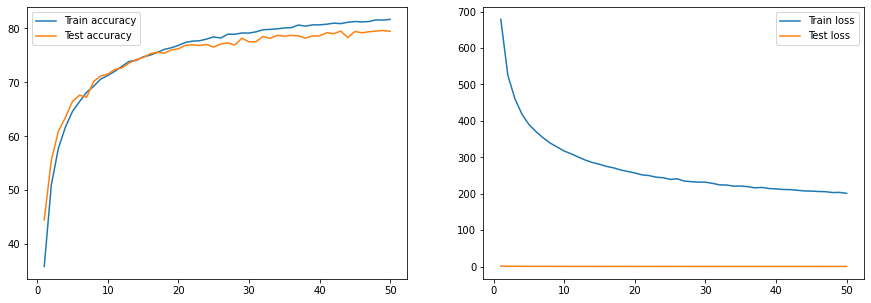

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_3.plot_accuracy()
plt.subplot(122)
model_3.plot_loss()
plt.savefig('images/model_3.png')
plt.show()

In [10]:
max(model_3.train_accuracy), max(model_3.test_accuracy)

(81.69, 79.61)

#### Model 4

In [6]:
from models import model_4
importlib.reload(model_4)

<module 'models.model_4' from 'd:\\Self Learning\\TSAI\\TSAI\\S9\\models\\model_4.py'>

In [7]:
from models.model_4 import Net_4
device = utils.get_device()
in_ch = 3
model_4 = Net_4(in_ch=in_ch).to(device)
summary(model_4, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]             144
            Conv2d-6           [-1, 16, 32, 32]             256
       BatchNorm2d-7           [-1, 16, 32, 32]              32
              ReLU-8           [-1, 16, 32, 32]               0
           Dropout-9           [-1, 16, 32, 32]               0
           Conv2d-10           [-1, 16, 15, 15]           2,304
      BatchNorm2d-11           [-1, 16, 15, 15]              32
             ReLU-12           [-1, 16, 15, 15]               0
          Dropout-13           [-1, 16, 15, 15]               0
           Conv2d-14           [-1, 16,

In [8]:
num_epochs = 50
train_loader, test_loader = dataset.get_data_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_4.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_4.model_train(device, train_loader, criterion, optimizer)
    model_4.model_test(device, test_loader, criterion)

Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Train: Loss=1.4188835620880127 Batch_id=390 Accuracy=36.98: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test: Average loss: 1.4537, Accuracy: 4704/10000 (47.04%), Accuracy Diff: 10.058

EPOCH: 2


Train: Loss=1.1639875173568726 Batch_id=390 Accuracy=54.41: 100%|██████████| 391/391 [00:35<00:00, 10.91it/s]


Test: Average loss: 1.1627, Accuracy: 5763/10000 (57.63%), Accuracy Diff: 3.224

EPOCH: 3


Train: Loss=1.0674079656600952 Batch_id=390 Accuracy=61.31: 100%|██████████| 391/391 [00:40<00:00,  9.61it/s]


Test: Average loss: 1.1282, Accuracy: 6002/10000 (60.02%), Accuracy Diff: 1.292

EPOCH: 4


Train: Loss=0.8966350555419922 Batch_id=390 Accuracy=64.98: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]


Test: Average loss: 0.9363, Accuracy: 6663/10000 (66.63%), Accuracy Diff: 1.654

EPOCH: 5


Train: Loss=0.755698561668396 Batch_id=390 Accuracy=67.63: 100%|██████████| 391/391 [00:44<00:00,  8.70it/s] 


Test: Average loss: 0.8398, Accuracy: 7038/10000 (70.38%), Accuracy Diff: 2.752

EPOCH: 6


Train: Loss=0.839252769947052 Batch_id=390 Accuracy=69.38: 100%|██████████| 391/391 [00:40<00:00,  9.72it/s] 


Test: Average loss: 0.8646, Accuracy: 6969/10000 (69.69%), Accuracy Diff: 0.308

EPOCH: 7


Train: Loss=0.7884970903396606 Batch_id=390 Accuracy=71.26: 100%|██████████| 391/391 [00:40<00:00,  9.75it/s]


Test: Average loss: 0.8192, Accuracy: 7129/10000 (71.29%), Accuracy Diff: 0.034

EPOCH: 8


Train: Loss=0.9340906143188477 Batch_id=390 Accuracy=72.43: 100%|██████████| 391/391 [00:39<00:00,  9.86it/s]


Test: Average loss: 0.7623, Accuracy: 7294/10000 (72.94%), Accuracy Diff: 0.514

EPOCH: 9


Train: Loss=0.7754638195037842 Batch_id=390 Accuracy=73.37: 100%|██████████| 391/391 [00:39<00:00, 10.00it/s]


Test: Average loss: 0.7330, Accuracy: 7436/10000 (74.36%), Accuracy Diff: 0.992

EPOCH: 10


Train: Loss=0.6319878697395325 Batch_id=390 Accuracy=74.31: 100%|██████████| 391/391 [00:39<00:00,  9.91it/s]


Test: Average loss: 0.7225, Accuracy: 7466/10000 (74.66%), Accuracy Diff: 0.346

EPOCH: 11


Train: Loss=0.8464991450309753 Batch_id=390 Accuracy=74.93: 100%|██████████| 391/391 [00:39<00:00,  9.86it/s] 


Test: Average loss: 0.7137, Accuracy: 7498/10000 (74.98%), Accuracy Diff: 0.046

EPOCH: 12


Train: Loss=0.6823611259460449 Batch_id=390 Accuracy=75.76: 100%|██████████| 391/391 [00:38<00:00, 10.13it/s] 


Test: Average loss: 0.6912, Accuracy: 7586/10000 (75.86%), Accuracy Diff: 0.104

EPOCH: 13


Train: Loss=0.7451804280281067 Batch_id=390 Accuracy=76.38: 100%|██████████| 391/391 [00:38<00:00, 10.12it/s] 


Test: Average loss: 0.6951, Accuracy: 7605/10000 (76.05%), Accuracy Diff: 0.33

EPOCH: 14


Train: Loss=1.110961675643921 Batch_id=390 Accuracy=77.04: 100%|██████████| 391/391 [00:38<00:00, 10.03it/s]  


Test: Average loss: 0.6560, Accuracy: 7729/10000 (77.29%), Accuracy Diff: 0.25

EPOCH: 15


Train: Loss=0.6566904783248901 Batch_id=390 Accuracy=77.51: 100%|██████████| 391/391 [00:39<00:00,  9.87it/s] 


Test: Average loss: 0.6742, Accuracy: 7681/10000 (76.81%), Accuracy Diff: 0.702

EPOCH: 16


Train: Loss=0.5950361490249634 Batch_id=390 Accuracy=77.92: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s] 


Test: Average loss: 0.6551, Accuracy: 7717/10000 (77.17%), Accuracy Diff: 0.75

EPOCH: 17


Train: Loss=0.7210224866867065 Batch_id=390 Accuracy=78.21: 100%|██████████| 391/391 [00:41<00:00,  9.48it/s] 


Test: Average loss: 0.6441, Accuracy: 7756/10000 (77.56%), Accuracy Diff: 0.654

EPOCH: 18


Train: Loss=0.4820038676261902 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [00:38<00:00, 10.14it/s] 


Test: Average loss: 0.6374, Accuracy: 7814/10000 (78.14%), Accuracy Diff: 0.652

EPOCH: 19


Train: Loss=0.7834731340408325 Batch_id=390 Accuracy=78.92: 100%|██████████| 391/391 [00:38<00:00, 10.12it/s] 


Test: Average loss: 0.6210, Accuracy: 7862/10000 (78.62%), Accuracy Diff: 0.304

EPOCH: 20


Train: Loss=0.6002711057662964 Batch_id=390 Accuracy=79.37: 100%|██████████| 391/391 [00:39<00:00,  9.99it/s] 


Test: Average loss: 0.6127, Accuracy: 7916/10000 (79.16%), Accuracy Diff: 0.206

EPOCH: 21


Train: Loss=0.45816969871520996 Batch_id=390 Accuracy=79.34: 100%|██████████| 391/391 [00:39<00:00,  9.93it/s]


Test: Average loss: 0.6084, Accuracy: 7915/10000 (79.15%), Accuracy Diff: 0.192

EPOCH: 22


Train: Loss=0.5378257036209106 Batch_id=390 Accuracy=79.84: 100%|██████████| 391/391 [00:39<00:00, 10.02it/s] 


Test: Average loss: 0.6179, Accuracy: 7908/10000 (79.08%), Accuracy Diff: 0.764

EPOCH: 23


Train: Loss=0.5737833380699158 Batch_id=390 Accuracy=79.96: 100%|██████████| 391/391 [00:38<00:00, 10.12it/s] 


Test: Average loss: 0.6066, Accuracy: 7887/10000 (78.87%), Accuracy Diff: 1.092

EPOCH: 24


Train: Loss=0.6331709027290344 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [00:37<00:00, 10.42it/s] 


Test: Average loss: 0.6021, Accuracy: 7948/10000 (79.48%), Accuracy Diff: 0.618

EPOCH: 25


Train: Loss=0.5443840026855469 Batch_id=390 Accuracy=80.36: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s] 


Test: Average loss: 0.6147, Accuracy: 7896/10000 (78.96%), Accuracy Diff: 1.398

EPOCH: 26


Train: Loss=0.669293224811554 Batch_id=390 Accuracy=80.57: 100%|██████████| 391/391 [00:34<00:00, 11.43it/s]  


Test: Average loss: 0.6036, Accuracy: 7931/10000 (79.31%), Accuracy Diff: 1.262

EPOCH: 27


Train: Loss=0.5618695020675659 Batch_id=390 Accuracy=80.94: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s] 


Test: Average loss: 0.5994, Accuracy: 7945/10000 (79.45%), Accuracy Diff: 1.488

EPOCH: 28


Train: Loss=0.45813989639282227 Batch_id=390 Accuracy=80.90: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]


Test: Average loss: 0.5946, Accuracy: 7995/10000 (79.95%), Accuracy Diff: 0.948

EPOCH: 29


Train: Loss=0.5375909805297852 Batch_id=390 Accuracy=81.09: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s] 


Test: Average loss: 0.5892, Accuracy: 7971/10000 (79.71%), Accuracy Diff: 1.382

EPOCH: 30


Train: Loss=0.49266284704208374 Batch_id=390 Accuracy=81.63: 100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


Test: Average loss: 0.5935, Accuracy: 7974/10000 (79.74%), Accuracy Diff: 1.892

EPOCH: 31


Train: Loss=0.3639628291130066 Batch_id=390 Accuracy=81.43: 100%|██████████| 391/391 [00:39<00:00,  9.89it/s] 


Test: Average loss: 0.5834, Accuracy: 7995/10000 (79.95%), Accuracy Diff: 1.482

EPOCH: 32


Train: Loss=0.6679614782333374 Batch_id=390 Accuracy=81.72: 100%|██████████| 391/391 [00:40<00:00,  9.74it/s] 


Test: Average loss: 0.5857, Accuracy: 8020/10000 (80.20%), Accuracy Diff: 1.52

EPOCH: 33


Train: Loss=0.6749757528305054 Batch_id=390 Accuracy=81.86: 100%|██████████| 391/391 [00:40<00:00,  9.59it/s] 


Test: Average loss: 0.5812, Accuracy: 8037/10000 (80.37%), Accuracy Diff: 1.494

EPOCH: 34


Train: Loss=0.503280758857727 Batch_id=390 Accuracy=81.94: 100%|██████████| 391/391 [00:38<00:00, 10.28it/s]  


Test: Average loss: 0.5848, Accuracy: 8019/10000 (80.19%), Accuracy Diff: 1.748

EPOCH: 35


Train: Loss=0.43427103757858276 Batch_id=390 Accuracy=82.27: 100%|██████████| 391/391 [00:38<00:00, 10.21it/s]


Test: Average loss: 0.5769, Accuracy: 8073/10000 (80.73%), Accuracy Diff: 1.538

EPOCH: 36


Train: Loss=0.46270450949668884 Batch_id=390 Accuracy=82.22: 100%|██████████| 391/391 [00:43<00:00,  9.01it/s]


Test: Average loss: 0.5814, Accuracy: 8018/10000 (80.18%), Accuracy Diff: 2.04

EPOCH: 37


Train: Loss=0.6085174083709717 Batch_id=390 Accuracy=82.28: 100%|██████████| 391/391 [00:39<00:00,  9.92it/s] 


Test: Average loss: 0.5758, Accuracy: 8060/10000 (80.60%), Accuracy Diff: 1.676

EPOCH: 38


Train: Loss=0.4334523677825928 Batch_id=390 Accuracy=82.56: 100%|██████████| 391/391 [00:39<00:00,  9.96it/s] 


Test: Average loss: 0.5826, Accuracy: 8021/10000 (80.21%), Accuracy Diff: 2.346

EPOCH: 39


Train: Loss=0.4605490267276764 Batch_id=390 Accuracy=82.41: 100%|██████████| 391/391 [00:43<00:00,  9.09it/s] 


Test: Average loss: 0.5743, Accuracy: 8054/10000 (80.54%), Accuracy Diff: 1.866

EPOCH: 40


Train: Loss=0.6255069375038147 Batch_id=390 Accuracy=82.71: 100%|██████████| 391/391 [00:20<00:00, 18.73it/s] 


Test: Average loss: 0.5809, Accuracy: 8059/10000 (80.59%), Accuracy Diff: 2.124

EPOCH: 41


Train: Loss=0.45108312368392944 Batch_id=390 Accuracy=82.82: 100%|██████████| 391/391 [00:21<00:00, 18.53it/s]


Test: Average loss: 0.5684, Accuracy: 8057/10000 (80.57%), Accuracy Diff: 2.254

EPOCH: 42


Train: Loss=0.39062750339508057 Batch_id=390 Accuracy=83.04: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]


Test: Average loss: 0.5756, Accuracy: 8063/10000 (80.63%), Accuracy Diff: 2.406

EPOCH: 43


Train: Loss=0.5493967533111572 Batch_id=390 Accuracy=83.04: 100%|██████████| 391/391 [00:20<00:00, 18.89it/s] 


Test: Average loss: 0.5698, Accuracy: 8093/10000 (80.93%), Accuracy Diff: 2.112

EPOCH: 44


Train: Loss=0.5971338152885437 Batch_id=390 Accuracy=83.04: 100%|██████████| 391/391 [00:23<00:00, 16.42it/s] 


Test: Average loss: 0.5790, Accuracy: 8065/10000 (80.65%), Accuracy Diff: 2.394

EPOCH: 45


Train: Loss=0.4715293049812317 Batch_id=390 Accuracy=83.11: 100%|██████████| 391/391 [00:21<00:00, 18.41it/s] 


Test: Average loss: 0.5842, Accuracy: 8053/10000 (80.53%), Accuracy Diff: 2.582

EPOCH: 46


Train: Loss=0.38998961448669434 Batch_id=390 Accuracy=83.28: 100%|██████████| 391/391 [00:20<00:00, 18.85it/s]


Test: Average loss: 0.5753, Accuracy: 8064/10000 (80.64%), Accuracy Diff: 2.644

EPOCH: 47


Train: Loss=0.5161378383636475 Batch_id=390 Accuracy=83.24: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s] 


Test: Average loss: 0.5849, Accuracy: 8052/10000 (80.52%), Accuracy Diff: 2.724

EPOCH: 48


Train: Loss=0.38143011927604675 Batch_id=390 Accuracy=83.45: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s]


Test: Average loss: 0.5732, Accuracy: 8099/10000 (80.99%), Accuracy Diff: 2.456

EPOCH: 49


Train: Loss=0.46837154030799866 Batch_id=390 Accuracy=83.40: 100%|██████████| 391/391 [00:20<00:00, 18.91it/s]


Test: Average loss: 0.5790, Accuracy: 8073/10000 (80.73%), Accuracy Diff: 2.674

EPOCH: 50


Train: Loss=0.5123732686042786 Batch_id=390 Accuracy=83.59: 100%|██████████| 391/391 [00:21<00:00, 17.99it/s] 


Test: Average loss: 0.5671, Accuracy: 8101/10000 (81.01%), Accuracy Diff: 2.58



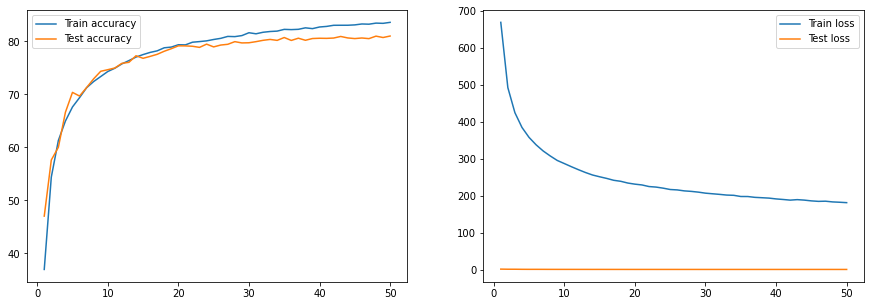

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_4.plot_accuracy()
plt.subplot(122)
model_4.plot_loss()
plt.savefig('images/model_4.png')
plt.show()

In [10]:
max(model_4.train_accuracy), max(model_4.test_accuracy)

(83.59, 81.01)

#### Model 4.1
- Implement OneCycleLR policy

In [6]:
from models import model_4
importlib.reload(model_4)

<module 'models.model_4' from 'd:\\Self Learning\\TSAI\\TSAI\\S9\\models\\model_4.py'>

In [7]:
from models.model_4 import Net_4
device = utils.get_device()
in_ch = 3
model_4 = Net_4(in_ch=in_ch).to(device)
summary(model_4, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]             144
            Conv2d-6           [-1, 16, 32, 32]             256
       BatchNorm2d-7           [-1, 16, 32, 32]              32
              ReLU-8           [-1, 16, 32, 32]               0
           Dropout-9           [-1, 16, 32, 32]               0
           Conv2d-10           [-1, 16, 15, 15]           2,304
      BatchNorm2d-11           [-1, 16, 15, 15]              32
             ReLU-12           [-1, 16, 15, 15]               0
          Dropout-13           [-1, 16, 15, 15]               0
           Conv2d-14           [-1, 16,

In [8]:
num_epochs = 70
criterion = F.nll_loss
max_lr = 0.1
lr = max_lr/10
optimizer = optim.SGD(model_4.parameters(), lr=lr, momentum=0.9)
train_loader, test_loader = dataset \
                                .set_batch_size(256) \
                                .get_data_loaders()
steps_per_epoch = len(train_loader)

scheduler = Scheduler('OneCycleLR', {
    'optimizer': optimizer,
    'pct_start': 0.5,
    'max_lr': max_lr, 
    'steps_per_epoch': steps_per_epoch, 
    'epochs': num_epochs, 
    'anneal_strategy': 'linear',
    'verbose': False
})

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_4.model_train(device, train_loader, criterion, optimizer, scheduler)
    model_4.model_test(device, test_loader, criterion)

Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Train: Loss=1.7176198959350586 Batch_id=195 Accuracy=27.65: 100%|██████████| 196/196 [00:34<00:00,  5.65it/s]


Test: Average loss: 1.6153, Accuracy: 3907/10000 (39.07%), Accuracy Diff: 11.424

EPOCH: 2


Train: Loss=1.3536794185638428 Batch_id=195 Accuracy=46.27: 100%|██████████| 196/196 [00:29<00:00,  6.67it/s]


Test: Average loss: 1.3117, Accuracy: 5232/10000 (52.32%), Accuracy Diff: 6.048

EPOCH: 3


Train: Loss=1.181994915008545 Batch_id=195 Accuracy=55.14: 100%|██████████| 196/196 [00:39<00:00,  4.93it/s] 


Test: Average loss: 1.1916, Accuracy: 5643/10000 (56.43%), Accuracy Diff: 1.29

EPOCH: 4


Train: Loss=1.061428189277649 Batch_id=195 Accuracy=61.23: 100%|██████████| 196/196 [00:38<00:00,  5.15it/s] 


Test: Average loss: 1.0227, Accuracy: 6358/10000 (63.58%), Accuracy Diff: 2.346

EPOCH: 5


Train: Loss=0.8159119486808777 Batch_id=195 Accuracy=64.88: 100%|██████████| 196/196 [00:37<00:00,  5.23it/s]


Test: Average loss: 1.0279, Accuracy: 6415/10000 (64.15%), Accuracy Diff: 0.728

EPOCH: 6


Train: Loss=0.8880623579025269 Batch_id=195 Accuracy=67.61: 100%|██████████| 196/196 [00:32<00:00,  6.04it/s]


Test: Average loss: 0.8873, Accuracy: 6913/10000 (69.13%), Accuracy Diff: 1.518

EPOCH: 7


Train: Loss=0.8507398366928101 Batch_id=195 Accuracy=69.75: 100%|██████████| 196/196 [00:34<00:00,  5.74it/s]


Test: Average loss: 0.8610, Accuracy: 7050/10000 (70.50%), Accuracy Diff: 0.752

EPOCH: 8


Train: Loss=0.7992942929267883 Batch_id=195 Accuracy=71.94: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]


Test: Average loss: 0.8425, Accuracy: 7139/10000 (71.39%), Accuracy Diff: 0.554

EPOCH: 9


Train: Loss=1.0237587690353394 Batch_id=195 Accuracy=73.18: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s]


Test: Average loss: 0.8282, Accuracy: 7094/10000 (70.94%), Accuracy Diff: 2.236

EPOCH: 10


Train: Loss=0.6968714594841003 Batch_id=195 Accuracy=74.18: 100%|██████████| 196/196 [00:27<00:00,  7.21it/s]


Test: Average loss: 0.7623, Accuracy: 7319/10000 (73.19%), Accuracy Diff: 0.992

EPOCH: 11


Train: Loss=0.7295449376106262 Batch_id=195 Accuracy=74.89: 100%|██████████| 196/196 [00:27<00:00,  7.00it/s]


Test: Average loss: 0.7356, Accuracy: 7444/10000 (74.44%), Accuracy Diff: 0.448

EPOCH: 12


Train: Loss=0.6152446269989014 Batch_id=195 Accuracy=75.69: 100%|██████████| 196/196 [00:34<00:00,  5.63it/s]


Test: Average loss: 0.7189, Accuracy: 7498/10000 (74.98%), Accuracy Diff: 0.706

EPOCH: 13


Train: Loss=0.5952717065811157 Batch_id=195 Accuracy=76.43: 100%|██████████| 196/196 [00:33<00:00,  5.81it/s]


Test: Average loss: 0.7120, Accuracy: 7581/10000 (75.81%), Accuracy Diff: 0.622

EPOCH: 14


Train: Loss=0.9946743249893188 Batch_id=195 Accuracy=76.99: 100%|██████████| 196/196 [00:31<00:00,  6.24it/s]


Test: Average loss: 0.7248, Accuracy: 7535/10000 (75.35%), Accuracy Diff: 1.64

EPOCH: 15


Train: Loss=0.742290198802948 Batch_id=195 Accuracy=77.50: 100%|██████████| 196/196 [00:32<00:00,  5.94it/s] 


Test: Average loss: 0.6706, Accuracy: 7684/10000 (76.84%), Accuracy Diff: 0.66

EPOCH: 16


Train: Loss=0.5812498927116394 Batch_id=195 Accuracy=77.79: 100%|██████████| 196/196 [00:30<00:00,  6.49it/s] 


Test: Average loss: 0.7474, Accuracy: 7444/10000 (74.44%), Accuracy Diff: 3.352

EPOCH: 17


Train: Loss=0.6829581260681152 Batch_id=195 Accuracy=78.25: 100%|██████████| 196/196 [00:30<00:00,  6.41it/s] 


Test: Average loss: 0.6391, Accuracy: 7787/10000 (77.87%), Accuracy Diff: 0.38

EPOCH: 18


Train: Loss=0.4518623352050781 Batch_id=195 Accuracy=78.74: 100%|██████████| 196/196 [00:28<00:00,  6.93it/s]


Test: Average loss: 0.6526, Accuracy: 7775/10000 (77.75%), Accuracy Diff: 0.988

EPOCH: 19


Train: Loss=0.7454837560653687 Batch_id=195 Accuracy=79.00: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s] 


Test: Average loss: 0.6892, Accuracy: 7661/10000 (76.61%), Accuracy Diff: 2.39

EPOCH: 20


Train: Loss=0.56840580701828 Batch_id=195 Accuracy=79.40: 100%|██████████| 196/196 [00:32<00:00,  6.10it/s]   


Test: Average loss: 0.6238, Accuracy: 7861/10000 (78.61%), Accuracy Diff: 0.786

EPOCH: 21


Train: Loss=0.5777533054351807 Batch_id=195 Accuracy=79.68: 100%|██████████| 196/196 [00:40<00:00,  4.85it/s] 


Test: Average loss: 0.6570, Accuracy: 7749/10000 (77.49%), Accuracy Diff: 2.186

EPOCH: 22


Train: Loss=0.494422048330307 Batch_id=195 Accuracy=80.25: 100%|██████████| 196/196 [00:39<00:00,  5.00it/s]  


Test: Average loss: 0.6435, Accuracy: 7788/10000 (77.88%), Accuracy Diff: 2.368

EPOCH: 23


Train: Loss=0.5202695727348328 Batch_id=195 Accuracy=80.24: 100%|██████████| 196/196 [00:32<00:00,  6.10it/s] 


Test: Average loss: 0.6413, Accuracy: 7798/10000 (77.98%), Accuracy Diff: 2.26

EPOCH: 24


Train: Loss=0.6428990960121155 Batch_id=195 Accuracy=80.65: 100%|██████████| 196/196 [00:27<00:00,  7.18it/s] 


Test: Average loss: 0.6610, Accuracy: 7741/10000 (77.41%), Accuracy Diff: 3.236

EPOCH: 25


Train: Loss=0.5085410475730896 Batch_id=195 Accuracy=80.55: 100%|██████████| 196/196 [00:28<00:00,  6.93it/s] 


Test: Average loss: 0.7252, Accuracy: 7568/10000 (75.68%), Accuracy Diff: 4.87

EPOCH: 26


Train: Loss=0.5161008238792419 Batch_id=195 Accuracy=80.76: 100%|██████████| 196/196 [00:28<00:00,  6.99it/s] 


Test: Average loss: 0.6329, Accuracy: 7835/10000 (78.35%), Accuracy Diff: 2.412

EPOCH: 27


Train: Loss=0.5275911092758179 Batch_id=195 Accuracy=80.95: 100%|██████████| 196/196 [00:28<00:00,  6.91it/s] 


Test: Average loss: 0.6161, Accuracy: 7902/10000 (79.02%), Accuracy Diff: 1.932

EPOCH: 28


Train: Loss=0.5093324780464172 Batch_id=195 Accuracy=81.37: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s] 


Test: Average loss: 0.6254, Accuracy: 7917/10000 (79.17%), Accuracy Diff: 2.198

EPOCH: 29


Train: Loss=0.45872074365615845 Batch_id=195 Accuracy=81.47: 100%|██████████| 196/196 [00:32<00:00,  5.96it/s]


Test: Average loss: 0.6223, Accuracy: 7883/10000 (78.83%), Accuracy Diff: 2.64

EPOCH: 30


Train: Loss=0.5284145474433899 Batch_id=195 Accuracy=81.59: 100%|██████████| 196/196 [00:32<00:00,  6.07it/s] 


Test: Average loss: 0.6603, Accuracy: 7788/10000 (77.88%), Accuracy Diff: 3.712

EPOCH: 31


Train: Loss=0.5471198558807373 Batch_id=195 Accuracy=81.76: 100%|██████████| 196/196 [00:32<00:00,  5.96it/s] 


Test: Average loss: 0.6241, Accuracy: 7883/10000 (78.83%), Accuracy Diff: 2.932

EPOCH: 32


Train: Loss=0.6519799828529358 Batch_id=195 Accuracy=81.73: 100%|██████████| 196/196 [00:37<00:00,  5.23it/s] 


Test: Average loss: 0.5972, Accuracy: 7931/10000 (79.31%), Accuracy Diff: 2.416

EPOCH: 33


Train: Loss=0.622970461845398 Batch_id=195 Accuracy=82.12: 100%|██████████| 196/196 [00:36<00:00,  5.39it/s]  


Test: Average loss: 0.5939, Accuracy: 7992/10000 (79.92%), Accuracy Diff: 2.204

EPOCH: 34


Train: Loss=0.4454292356967926 Batch_id=195 Accuracy=82.31: 100%|██████████| 196/196 [00:32<00:00,  5.98it/s] 


Test: Average loss: 0.6013, Accuracy: 7962/10000 (79.62%), Accuracy Diff: 2.692

EPOCH: 35


Train: Loss=0.4596323072910309 Batch_id=195 Accuracy=82.34: 100%|██████████| 196/196 [00:32<00:00,  6.11it/s] 


Test: Average loss: 0.6138, Accuracy: 7919/10000 (79.19%), Accuracy Diff: 3.154

EPOCH: 36


Train: Loss=0.44110193848609924 Batch_id=195 Accuracy=82.69: 100%|██████████| 196/196 [00:34<00:00,  5.67it/s]


Test: Average loss: 0.6392, Accuracy: 7902/10000 (79.02%), Accuracy Diff: 3.672

EPOCH: 37


Train: Loss=0.6339473724365234 Batch_id=195 Accuracy=82.53: 100%|██████████| 196/196 [00:37<00:00,  5.19it/s] 


Test: Average loss: 0.6038, Accuracy: 7983/10000 (79.83%), Accuracy Diff: 2.702

EPOCH: 38


Train: Loss=0.4493323862552643 Batch_id=195 Accuracy=82.75: 100%|██████████| 196/196 [00:32<00:00,  6.02it/s] 


Test: Average loss: 0.6158, Accuracy: 7935/10000 (79.35%), Accuracy Diff: 3.402

EPOCH: 39


Train: Loss=0.5166664123535156 Batch_id=195 Accuracy=82.91: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s] 


Test: Average loss: 0.6296, Accuracy: 7920/10000 (79.20%), Accuracy Diff: 3.712

EPOCH: 40


Train: Loss=0.65432208776474 Batch_id=195 Accuracy=83.01: 100%|██████████| 196/196 [00:37<00:00,  5.29it/s]   


Test: Average loss: 0.6194, Accuracy: 7933/10000 (79.33%), Accuracy Diff: 3.68

EPOCH: 41


Train: Loss=0.5058070421218872 Batch_id=195 Accuracy=83.32: 100%|██████████| 196/196 [00:32<00:00,  5.95it/s] 


Test: Average loss: 0.6283, Accuracy: 7958/10000 (79.58%), Accuracy Diff: 3.742

EPOCH: 42


Train: Loss=0.4219586253166199 Batch_id=195 Accuracy=83.50: 100%|██████████| 196/196 [00:33<00:00,  5.81it/s] 


Test: Average loss: 0.5894, Accuracy: 8029/10000 (80.29%), Accuracy Diff: 3.21

EPOCH: 43


Train: Loss=0.4633220136165619 Batch_id=195 Accuracy=83.72: 100%|██████████| 196/196 [00:31<00:00,  6.22it/s] 


Test: Average loss: 0.5712, Accuracy: 8055/10000 (80.55%), Accuracy Diff: 3.168

EPOCH: 44


Train: Loss=0.605542778968811 Batch_id=195 Accuracy=83.90: 100%|██████████| 196/196 [00:33<00:00,  5.90it/s]  


Test: Average loss: 0.5933, Accuracy: 8012/10000 (80.12%), Accuracy Diff: 3.784

EPOCH: 45


Train: Loss=0.3222876787185669 Batch_id=195 Accuracy=83.90: 100%|██████████| 196/196 [00:33<00:00,  5.84it/s] 


Test: Average loss: 0.5846, Accuracy: 8042/10000 (80.42%), Accuracy Diff: 3.482

EPOCH: 46


Train: Loss=0.38123923540115356 Batch_id=195 Accuracy=84.01: 100%|██████████| 196/196 [00:33<00:00,  5.86it/s]


Test: Average loss: 0.5878, Accuracy: 8071/10000 (80.71%), Accuracy Diff: 3.3

EPOCH: 47


Train: Loss=0.5545132756233215 Batch_id=195 Accuracy=83.94: 100%|██████████| 196/196 [00:32<00:00,  6.07it/s] 


Test: Average loss: 0.5854, Accuracy: 8046/10000 (80.46%), Accuracy Diff: 3.48

EPOCH: 48


Train: Loss=0.2578987777233124 Batch_id=195 Accuracy=84.34: 100%|██████████| 196/196 [00:31<00:00,  6.20it/s] 


Test: Average loss: 0.6007, Accuracy: 8021/10000 (80.21%), Accuracy Diff: 4.128

EPOCH: 49


Train: Loss=0.4135693609714508 Batch_id=195 Accuracy=84.45: 100%|██████████| 196/196 [00:31<00:00,  6.13it/s] 


Test: Average loss: 0.5837, Accuracy: 8077/10000 (80.77%), Accuracy Diff: 3.682

EPOCH: 50


Train: Loss=0.5984971523284912 Batch_id=195 Accuracy=84.56: 100%|██████████| 196/196 [00:32<00:00,  6.10it/s] 


Test: Average loss: 0.5843, Accuracy: 8031/10000 (80.31%), Accuracy Diff: 4.246

EPOCH: 51


Train: Loss=0.5864948630332947 Batch_id=195 Accuracy=84.75: 100%|██████████| 196/196 [00:32<00:00,  6.01it/s] 


Test: Average loss: 0.5803, Accuracy: 8061/10000 (80.61%), Accuracy Diff: 4.138

EPOCH: 52


Train: Loss=0.40640202164649963 Batch_id=195 Accuracy=84.48: 100%|██████████| 196/196 [00:31<00:00,  6.15it/s]


Test: Average loss: 0.5745, Accuracy: 8084/10000 (80.84%), Accuracy Diff: 3.636

EPOCH: 53


Train: Loss=0.5385408401489258 Batch_id=195 Accuracy=85.00: 100%|██████████| 196/196 [00:32<00:00,  6.07it/s] 


Test: Average loss: 0.5779, Accuracy: 8083/10000 (80.83%), Accuracy Diff: 4.166

EPOCH: 54


Train: Loss=0.5661728978157043 Batch_id=195 Accuracy=84.79: 100%|██████████| 196/196 [00:31<00:00,  6.17it/s] 


Test: Average loss: 0.5919, Accuracy: 8080/10000 (80.80%), Accuracy Diff: 3.994

EPOCH: 55


Train: Loss=0.4741324484348297 Batch_id=195 Accuracy=85.13: 100%|██████████| 196/196 [00:31<00:00,  6.18it/s] 


Test: Average loss: 0.6073, Accuracy: 8031/10000 (80.31%), Accuracy Diff: 4.824

EPOCH: 56


Train: Loss=0.5533667802810669 Batch_id=195 Accuracy=85.27: 100%|██████████| 196/196 [00:32<00:00,  5.98it/s] 


Test: Average loss: 0.5885, Accuracy: 8055/10000 (80.55%), Accuracy Diff: 4.72

EPOCH: 57


Train: Loss=0.4734486937522888 Batch_id=195 Accuracy=85.36: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s] 


Test: Average loss: 0.5735, Accuracy: 8154/10000 (81.54%), Accuracy Diff: 3.824

EPOCH: 58


Train: Loss=0.6306681632995605 Batch_id=195 Accuracy=85.48: 100%|██████████| 196/196 [00:37<00:00,  5.22it/s] 


Test: Average loss: 0.5654, Accuracy: 8133/10000 (81.33%), Accuracy Diff: 4.152

EPOCH: 59


Train: Loss=0.4226303696632385 Batch_id=195 Accuracy=85.71: 100%|██████████| 196/196 [00:31<00:00,  6.21it/s] 


Test: Average loss: 0.5898, Accuracy: 8111/10000 (81.11%), Accuracy Diff: 4.596

EPOCH: 60


Train: Loss=0.389007031917572 Batch_id=195 Accuracy=85.82: 100%|██████████| 196/196 [00:33<00:00,  5.82it/s]  


Test: Average loss: 0.5689, Accuracy: 8168/10000 (81.68%), Accuracy Diff: 4.14

EPOCH: 61


Train: Loss=0.4831880033016205 Batch_id=195 Accuracy=85.78: 100%|██████████| 196/196 [00:26<00:00,  7.34it/s] 


Test: Average loss: 0.5895, Accuracy: 8092/10000 (80.92%), Accuracy Diff: 4.858

EPOCH: 62


Train: Loss=0.5025240182876587 Batch_id=195 Accuracy=86.19: 100%|██████████| 196/196 [00:27<00:00,  7.01it/s] 


Test: Average loss: 0.5641, Accuracy: 8148/10000 (81.48%), Accuracy Diff: 4.708

EPOCH: 63


Train: Loss=0.2819632589817047 Batch_id=195 Accuracy=86.26: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s] 


Test: Average loss: 0.5664, Accuracy: 8189/10000 (81.89%), Accuracy Diff: 4.366

EPOCH: 64


Train: Loss=0.5326871275901794 Batch_id=195 Accuracy=86.37: 100%|██████████| 196/196 [00:26<00:00,  7.35it/s] 


Test: Average loss: 0.5745, Accuracy: 8142/10000 (81.42%), Accuracy Diff: 4.946

EPOCH: 65


Train: Loss=0.28378134965896606 Batch_id=195 Accuracy=86.36: 100%|██████████| 196/196 [00:27<00:00,  7.13it/s]


Test: Average loss: 0.5657, Accuracy: 8178/10000 (81.78%), Accuracy Diff: 4.576

EPOCH: 66


Train: Loss=0.3903825283050537 Batch_id=195 Accuracy=86.72: 100%|██████████| 196/196 [00:26<00:00,  7.28it/s] 


Test: Average loss: 0.5732, Accuracy: 8144/10000 (81.44%), Accuracy Diff: 5.276

EPOCH: 67


Train: Loss=0.2935389578342438 Batch_id=195 Accuracy=87.07: 100%|██████████| 196/196 [00:27<00:00,  7.25it/s] 


Test: Average loss: 0.5698, Accuracy: 8198/10000 (81.98%), Accuracy Diff: 5.086

EPOCH: 68


Train: Loss=0.38415127992630005 Batch_id=195 Accuracy=87.07: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]


Test: Average loss: 0.5648, Accuracy: 8218/10000 (82.18%), Accuracy Diff: 4.888

EPOCH: 69


Train: Loss=0.40592390298843384 Batch_id=195 Accuracy=87.32: 100%|██████████| 196/196 [00:30<00:00,  6.48it/s]


Test: Average loss: 0.5618, Accuracy: 8212/10000 (82.12%), Accuracy Diff: 5.198

EPOCH: 70


Train: Loss=0.2815489172935486 Batch_id=195 Accuracy=87.46: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s] 


Test: Average loss: 0.5599, Accuracy: 8213/10000 (82.13%), Accuracy Diff: 5.326



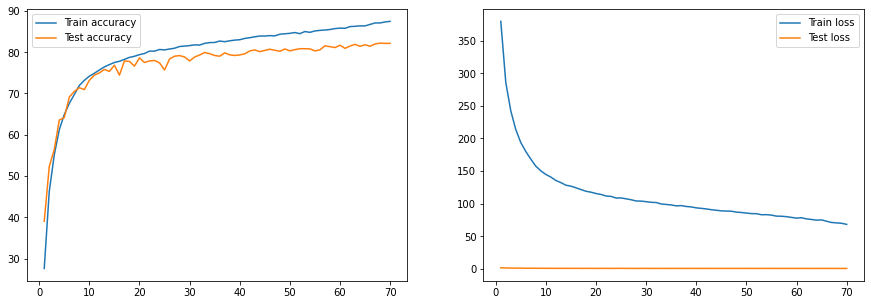

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_4.plot_accuracy()
plt.subplot(122)
model_4.plot_loss()
plt.savefig('images/model_4_1.png')
plt.show()

In [10]:
max(model_4.train_accuracy), max(model_4.test_accuracy)

(87.456, 82.18)

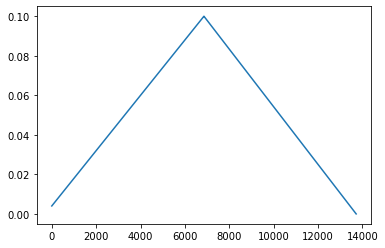

In [11]:
scheduler.plot_lr_change()

#### Model 5
- Implement OneCycleLR policy
- Increase model capacity

In [3]:
from models.model_5 import Net_5

device = utils.get_device()
in_ch = 3
model_5 = Net_5(in_ch=in_ch).to(device)
summary(model_5, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           1,024
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 15, 15]           9,216
      BatchNorm2d-14           [-1, 32,

In [ ]:
num_epochs = 50
criterion = F.nll_loss
max_lr = 0.1
lr = max_lr/10
optimizer = optim.SGD(model_5.parameters(), lr=lr, momentum=0.9)

train_loader, test_loader = dataset \
                                .set_batch_size(256) \
                                .get_data_loaders()
steps_per_epoch = len(train_loader)

scheduler = Scheduler('OneCycleLR', {
    'optimizer': optimizer,
    'pct_start': 0.4,
    'max_lr': max_lr, 
    'steps_per_epoch': steps_per_epoch, 
    'epochs': num_epochs, 
    'anneal_strategy': 'linear',
    'verbose': False
})

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_5.model_train(device, train_loader, criterion, optimizer, scheduler)
    model_5.model_test(device, test_loader, criterion)

Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Train: Loss=1.4991309642791748 Batch_id=195 Accuracy=34.67: 100%|██████████| 196/196 [00:38<00:00,  5.09it/s]


Test: Average loss: 1.3811, Accuracy: 4940/10000 (49.40%), Accuracy Diff: 14.732

EPOCH: 2


Train: Loss=1.3836534023284912 Batch_id=195 Accuracy=54.15: 100%|██████████| 196/196 [00:33<00:00,  5.86it/s]


Test: Average loss: 1.1649, Accuracy: 5856/10000 (58.56%), Accuracy Diff: 4.406

EPOCH: 3


Train: Loss=1.0297988653182983 Batch_id=195 Accuracy=62.25: 100%|██████████| 196/196 [00:32<00:00,  5.94it/s]


Test: Average loss: 1.0166, Accuracy: 6453/10000 (64.53%), Accuracy Diff: 2.278

EPOCH: 4


Train: Loss=0.8878322839736938 Batch_id=195 Accuracy=67.91: 100%|██████████| 196/196 [00:31<00:00,  6.27it/s]


Test: Average loss: 0.8432, Accuracy: 7070/10000 (70.70%), Accuracy Diff: 2.794

EPOCH: 5


Train: Loss=0.8290637135505676 Batch_id=195 Accuracy=71.92: 100%|██████████| 196/196 [00:32<00:00,  6.11it/s]


Test: Average loss: 0.7626, Accuracy: 7345/10000 (73.45%), Accuracy Diff: 1.53

EPOCH: 6


Train: Loss=0.6959179639816284 Batch_id=195 Accuracy=74.11: 100%|██████████| 196/196 [00:36<00:00,  5.30it/s]


Test: Average loss: 0.7546, Accuracy: 7351/10000 (73.51%), Accuracy Diff: 0.604

EPOCH: 7


Train: Loss=0.759236216545105 Batch_id=195 Accuracy=76.07: 100%|██████████| 196/196 [00:35<00:00,  5.59it/s] 


Test: Average loss: 0.6903, Accuracy: 7569/10000 (75.69%), Accuracy Diff: 0.38

EPOCH: 8


Train: Loss=0.8450977206230164 Batch_id=195 Accuracy=77.83: 100%|██████████| 196/196 [00:33<00:00,  5.81it/s]


Test: Average loss: 0.6901, Accuracy: 7653/10000 (76.53%), Accuracy Diff: 1.296

EPOCH: 9


Train: Loss=0.6754652261734009 Batch_id=195 Accuracy=78.84: 100%|██████████| 196/196 [00:32<00:00,  5.99it/s] 


Test: Average loss: 0.6862, Accuracy: 7687/10000 (76.87%), Accuracy Diff: 1.974

EPOCH: 10


Train: Loss=0.5525879859924316 Batch_id=195 Accuracy=80.47: 100%|██████████| 196/196 [00:31<00:00,  6.26it/s] 


Test: Average loss: 0.6467, Accuracy: 7765/10000 (77.65%), Accuracy Diff: 2.822

EPOCH: 11


Train: Loss=0.5267001390457153 Batch_id=195 Accuracy=81.03: 100%|██████████| 196/196 [00:35<00:00,  5.57it/s] 


Test: Average loss: 0.6418, Accuracy: 7855/10000 (78.55%), Accuracy Diff: 2.482

EPOCH: 12


Train: Loss=0.38649630546569824 Batch_id=195 Accuracy=81.82: 100%|██████████| 196/196 [00:34<00:00,  5.76it/s]


Test: Average loss: 0.6078, Accuracy: 7924/10000 (79.24%), Accuracy Diff: 2.584

EPOCH: 13


Train: Loss=0.3918474614620209 Batch_id=195 Accuracy=82.61: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s] 


Test: Average loss: 0.6181, Accuracy: 7916/10000 (79.16%), Accuracy Diff: 3.454

EPOCH: 14


Train: Loss=0.6014896631240845 Batch_id=195 Accuracy=83.43: 100%|██████████| 196/196 [00:33<00:00,  5.85it/s] 


Test: Average loss: 0.6112, Accuracy: 7967/10000 (79.67%), Accuracy Diff: 3.758

EPOCH: 15


Train: Loss=0.4114014208316803 Batch_id=195 Accuracy=83.72: 100%|██████████| 196/196 [00:31<00:00,  6.31it/s] 


Test: Average loss: 0.6078, Accuracy: 7947/10000 (79.47%), Accuracy Diff: 4.25

EPOCH: 16


Train: Loss=0.4821719229221344 Batch_id=195 Accuracy=84.64: 100%|██████████| 196/196 [00:31<00:00,  6.30it/s] 


Test: Average loss: 0.5611, Accuracy: 8147/10000 (81.47%), Accuracy Diff: 3.166

EPOCH: 17


Train: Loss=0.4694645404815674 Batch_id=195 Accuracy=85.03: 100%|██████████| 196/196 [00:33<00:00,  5.87it/s] 


Test: Average loss: 0.5938, Accuracy: 8041/10000 (80.41%), Accuracy Diff: 4.624

EPOCH: 18


Train: Loss=0.4983273148536682 Batch_id=195 Accuracy=85.37: 100%|██████████| 196/196 [00:30<00:00,  6.33it/s] 


Test: Average loss: 0.5874, Accuracy: 8105/10000 (81.05%), Accuracy Diff: 4.322

EPOCH: 19


Train: Loss=0.6074306964874268 Batch_id=195 Accuracy=85.95: 100%|██████████| 196/196 [00:33<00:00,  5.83it/s] 


Test: Average loss: 0.5864, Accuracy: 8078/10000 (80.78%), Accuracy Diff: 5.17

EPOCH: 20


Train: Loss=0.4498201012611389 Batch_id=195 Accuracy=86.38: 100%|██████████| 196/196 [00:32<00:00,  6.08it/s] 


Test: Average loss: 0.5793, Accuracy: 8116/10000 (81.16%), Accuracy Diff: 5.216

EPOCH: 21


Train: Loss=0.44225627183914185 Batch_id=195 Accuracy=86.83: 100%|██████████| 196/196 [00:30<00:00,  6.33it/s]


Test: Average loss: 0.5890, Accuracy: 8128/10000 (81.28%), Accuracy Diff: 5.552

EPOCH: 22


Train: Loss=0.3825854957103729 Batch_id=195 Accuracy=87.21: 100%|██████████| 196/196 [00:32<00:00,  6.03it/s] 


Test: Average loss: 0.5687, Accuracy: 8132/10000 (81.32%), Accuracy Diff: 5.886

EPOCH: 23


Train: Loss=0.4127832353115082 Batch_id=195 Accuracy=87.73: 100%|██████████| 196/196 [00:30<00:00,  6.33it/s] 


Test: Average loss: 0.6108, Accuracy: 8078/10000 (80.78%), Accuracy Diff: 6.948

EPOCH: 24


Train: Loss=0.26504820585250854 Batch_id=195 Accuracy=88.20: 100%|██████████| 196/196 [00:31<00:00,  6.30it/s]


Test: Average loss: 0.5829, Accuracy: 8125/10000 (81.25%), Accuracy Diff: 6.954

EPOCH: 25


Train: Loss=0.37575462460517883 Batch_id=195 Accuracy=88.62: 100%|██████████| 196/196 [00:31<00:00,  6.28it/s]


Test: Average loss: 0.5893, Accuracy: 8104/10000 (81.04%), Accuracy Diff: 7.582

EPOCH: 26


Train: Loss=0.4790191054344177 Batch_id=195 Accuracy=88.76: 100%|██████████| 196/196 [00:31<00:00,  6.18it/s] 


Test: Average loss: 0.5830, Accuracy: 8221/10000 (82.21%), Accuracy Diff: 6.55

EPOCH: 27


Train: Loss=0.3644259572029114 Batch_id=195 Accuracy=88.96: 100%|██████████| 196/196 [00:30<00:00,  6.34it/s] 


Test: Average loss: 0.5805, Accuracy: 8190/10000 (81.90%), Accuracy Diff: 7.058

EPOCH: 28


Train: Loss=0.40666860342025757 Batch_id=195 Accuracy=89.50: 100%|██████████| 196/196 [00:30<00:00,  6.41it/s]


Test: Average loss: 0.6116, Accuracy: 8164/10000 (81.64%), Accuracy Diff: 7.862

EPOCH: 29


Train: Loss=0.28524166345596313 Batch_id=195 Accuracy=89.92: 100%|██████████| 196/196 [00:33<00:00,  5.91it/s]


Test: Average loss: 0.5979, Accuracy: 8182/10000 (81.82%), Accuracy Diff: 8.104

EPOCH: 30


Train: Loss=0.25169140100479126 Batch_id=195 Accuracy=90.19: 100%|██████████| 196/196 [00:31<00:00,  6.19it/s]


Test: Average loss: 0.5997, Accuracy: 8210/10000 (82.10%), Accuracy Diff: 8.09

EPOCH: 31


Train: Loss=0.2058907300233841 Batch_id=195 Accuracy=90.57: 100%|██████████| 196/196 [00:31<00:00,  6.31it/s] 


Test: Average loss: 0.6224, Accuracy: 8182/10000 (81.82%), Accuracy Diff: 8.754

EPOCH: 32


Train: Loss=0.3089544475078583 Batch_id=195 Accuracy=90.90: 100%|██████████| 196/196 [00:31<00:00,  6.30it/s] 


Test: Average loss: 0.6103, Accuracy: 8201/10000 (82.01%), Accuracy Diff: 8.888

EPOCH: 33


Train: Loss=0.48379483819007874 Batch_id=195 Accuracy=91.03: 100%|██████████| 196/196 [00:30<00:00,  6.38it/s]


Test: Average loss: 0.6115, Accuracy: 8232/10000 (82.32%), Accuracy Diff: 8.71

EPOCH: 34


Train: Loss=0.2927514910697937 Batch_id=195 Accuracy=91.49: 100%|██████████| 196/196 [00:30<00:00,  6.44it/s] 


Test: Average loss: 0.6281, Accuracy: 8164/10000 (81.64%), Accuracy Diff: 9.854

EPOCH: 35


Train: Loss=0.22766926884651184 Batch_id=195 Accuracy=91.61: 100%|██████████| 196/196 [00:30<00:00,  6.38it/s]


Test: Average loss: 0.6268, Accuracy: 8216/10000 (82.16%), Accuracy Diff: 9.446

EPOCH: 36


Train: Loss=0.19125664234161377 Batch_id=195 Accuracy=91.86: 100%|██████████| 196/196 [00:31<00:00,  6.24it/s]


Test: Average loss: 0.6075, Accuracy: 8283/10000 (82.83%), Accuracy Diff: 9.028

EPOCH: 37


Train: Loss=0.26637569069862366 Batch_id=195 Accuracy=92.17: 100%|██████████| 196/196 [00:30<00:00,  6.48it/s]


Test: Average loss: 0.6044, Accuracy: 8293/10000 (82.93%), Accuracy Diff: 9.238

EPOCH: 38


Train: Loss=0.2101142406463623 Batch_id=195 Accuracy=92.68: 100%|██████████| 196/196 [00:30<00:00,  6.44it/s] 


Test: Average loss: 0.6165, Accuracy: 8273/10000 (82.73%), Accuracy Diff: 9.952

EPOCH: 39


Train: Loss=0.2847571074962616 Batch_id=195 Accuracy=92.68: 100%|██████████| 196/196 [00:30<00:00,  6.38it/s] 


Test: Average loss: 0.6249, Accuracy: 8287/10000 (82.87%), Accuracy Diff: 9.812

EPOCH: 40


Train: Loss=0.16805633902549744 Batch_id=195 Accuracy=92.97: 100%|██████████| 196/196 [00:32<00:00,  6.02it/s]


Test: Average loss: 0.6365, Accuracy: 8234/10000 (82.34%), Accuracy Diff: 10.63

EPOCH: 41


Train: Loss=0.20746493339538574 Batch_id=195 Accuracy=93.18: 100%|██████████| 196/196 [00:31<00:00,  6.28it/s]


Test: Average loss: 0.6293, Accuracy: 8266/10000 (82.66%), Accuracy Diff: 10.518

EPOCH: 42


Train: Loss=0.24312333762645721 Batch_id=195 Accuracy=93.48: 100%|██████████| 196/196 [00:32<00:00,  6.08it/s]


Test: Average loss: 0.6431, Accuracy: 8251/10000 (82.51%), Accuracy Diff: 10.972

EPOCH: 43


Train: Loss=0.32370564341545105 Batch_id=195 Accuracy=93.68: 100%|██████████| 196/196 [00:31<00:00,  6.29it/s]


Test: Average loss: 0.6534, Accuracy: 8269/10000 (82.69%), Accuracy Diff: 10.99

EPOCH: 44


Train: Loss=0.18428491055965424 Batch_id=195 Accuracy=93.89: 100%|██████████| 196/196 [00:34<00:00,  5.75it/s]


Test: Average loss: 0.6480, Accuracy: 8290/10000 (82.90%), Accuracy Diff: 10.994

EPOCH: 45


Train: Loss=0.31236228346824646 Batch_id=195 Accuracy=94.33: 100%|██████████| 196/196 [00:30<00:00,  6.41it/s]


Test: Average loss: 0.6717, Accuracy: 8248/10000 (82.48%), Accuracy Diff: 11.85

EPOCH: 46


Train: Loss=0.16036652028560638 Batch_id=195 Accuracy=94.52: 100%|██████████| 196/196 [00:30<00:00,  6.44it/s]


Test: Average loss: 0.6512, Accuracy: 8287/10000 (82.87%), Accuracy Diff: 11.648

EPOCH: 47


Train: Loss=0.24530163407325745 Batch_id=195 Accuracy=94.87: 100%|██████████| 196/196 [00:30<00:00,  6.41it/s]


Test: Average loss: 0.6585, Accuracy: 8303/10000 (83.03%), Accuracy Diff: 11.842

EPOCH: 48


Train: Loss=0.047626469284296036 Batch_id=195 Accuracy=95.13: 100%|██████████| 196/196 [00:30<00:00,  6.35it/s]


Test: Average loss: 0.6548, Accuracy: 8331/10000 (83.31%), Accuracy Diff: 11.82

EPOCH: 49


Train: Loss=0.13018159568309784 Batch_id=195 Accuracy=95.55: 100%|██████████| 196/196 [00:32<00:00,  5.97it/s]


Test: Average loss: 0.6582, Accuracy: 8340/10000 (83.40%), Accuracy Diff: 12.148

EPOCH: 50


Train: Loss=0.03505145385861397 Batch_id=195 Accuracy=95.81: 100%|██████████| 196/196 [00:30<00:00,  6.35it/s]


Test: Average loss: 0.6550, Accuracy: 8341/10000 (83.41%), Accuracy Diff: 12.398



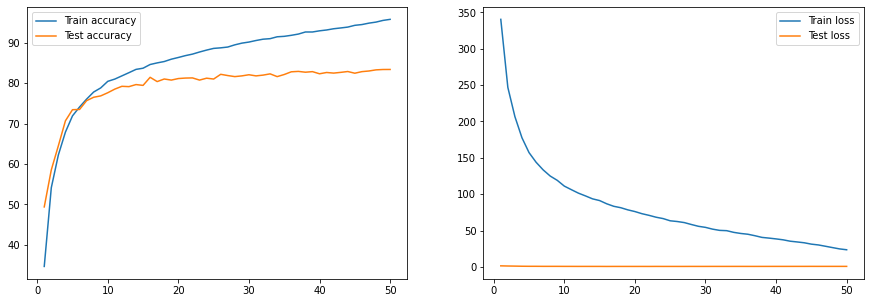

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_5.plot_accuracy()
plt.subplot(122)
model_5.plot_loss()
plt.savefig('images/model_5.png')
plt.show()

In [ ]:
max(model_5.train_accuracy), max(model_5.test_accuracy)

(95.808, 83.41)

#### Model 5.1
- Implement augmentations
- Implement OneCycleLR policy
- Increase model capacity

In [3]:
from models.model_5 import Net_5

device = utils.get_device()
in_ch = 3
model_5 = Net_5(in_ch=in_ch).to(device)
summary(model_5, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           1,024
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 15, 15]           9,216
      BatchNorm2d-14           [-1, 32,

In [4]:
dataset = Dataset('CIFAR10', trans_lib='albumentations')

# Add augmentations for training dataset
dataset.dt.set_transforms('train', [
    A.HorizontalFlip(),
    A.ShiftScaleRotate(),
    A.CoarseDropout(max_holes=1, min_holes=1, max_height=16, max_width=16, fill_value=dataset.dt.mean)
], True)

train_loader, test_loader = dataset \
                                .set_batch_size(256) \
                                .get_data_loaders()
num_epochs = 50
criterion = F.nll_loss
max_lr = 0.1
lr = max_lr/10
optimizer = optim.SGD(model_5.parameters(), lr=lr, momentum=0.9)
steps_per_epoch = len(train_loader)

scheduler = Scheduler('OneCycleLR', {
    'optimizer': optimizer,
    'pct_start': 0.4,
    'max_lr': max_lr, 
    'steps_per_epoch': steps_per_epoch, 
    'epochs': num_epochs, 
    'anneal_strategy': 'linear',
    'verbose': False
})

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_5.model_train(device, train_loader, criterion, optimizer, scheduler)
    model_5.model_test(device, test_loader, criterion)

Files already downloaded and verified
Files already downloaded and verified
The mean and SD for CIFAR10 dataset are [0.49139968 0.48215841 0.44653091] and [0.24703223 0.24348513 0.26158784] respectively.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Train: Loss=1.674110770225525 Batch_id=195 Accuracy=28.07: 100%|██████████| 196/196 [00:29<00:00,  6.69it/s] 


Test: Average loss: 1.5209, Accuracy: 4323/10000 (43.23%), Accuracy Diff: 15.16

EPOCH: 2


Train: Loss=1.6365464925765991 Batch_id=195 Accuracy=42.48: 100%|██████████| 196/196 [00:30<00:00,  6.46it/s]


Test: Average loss: 1.3346, Accuracy: 5135/10000 (51.35%), Accuracy Diff: 8.87

EPOCH: 3


Train: Loss=1.4633870124816895 Batch_id=195 Accuracy=47.87: 100%|██████████| 196/196 [00:29<00:00,  6.71it/s]


Test: Average loss: 1.2293, Accuracy: 5565/10000 (55.65%), Accuracy Diff: 7.778

EPOCH: 4


Train: Loss=1.3905096054077148 Batch_id=195 Accuracy=51.33: 100%|██████████| 196/196 [00:30<00:00,  6.39it/s]


Test: Average loss: 1.0939, Accuracy: 6083/10000 (60.83%), Accuracy Diff: 9.5

EPOCH: 5


Train: Loss=1.2963670492172241 Batch_id=195 Accuracy=54.47: 100%|██████████| 196/196 [00:28<00:00,  6.78it/s]


Test: Average loss: 1.0305, Accuracy: 6348/10000 (63.48%), Accuracy Diff: 9.006

EPOCH: 6


Train: Loss=1.0983664989471436 Batch_id=195 Accuracy=57.09: 100%|██████████| 196/196 [00:31<00:00,  6.28it/s]


Test: Average loss: 0.9990, Accuracy: 6541/10000 (65.41%), Accuracy Diff: 8.32

EPOCH: 7


Train: Loss=1.2563120126724243 Batch_id=195 Accuracy=58.70: 100%|██████████| 196/196 [00:30<00:00,  6.42it/s]


Test: Average loss: 0.9372, Accuracy: 6687/10000 (66.87%), Accuracy Diff: 8.168

EPOCH: 8


Train: Loss=1.275078296661377 Batch_id=195 Accuracy=60.55: 100%|██████████| 196/196 [00:30<00:00,  6.48it/s] 


Test: Average loss: 0.9829, Accuracy: 6662/10000 (66.62%), Accuracy Diff: 6.068

EPOCH: 9


Train: Loss=1.0386394262313843 Batch_id=195 Accuracy=61.91: 100%|██████████| 196/196 [00:30<00:00,  6.43it/s]


Test: Average loss: 0.8082, Accuracy: 7103/10000 (71.03%), Accuracy Diff: 9.122

EPOCH: 10


Train: Loss=1.0390369892120361 Batch_id=195 Accuracy=63.46: 100%|██████████| 196/196 [00:28<00:00,  6.86it/s]


Test: Average loss: 0.8107, Accuracy: 7187/10000 (71.87%), Accuracy Diff: 8.412

EPOCH: 11


Train: Loss=1.0601966381072998 Batch_id=195 Accuracy=64.22: 100%|██████████| 196/196 [00:29<00:00,  6.56it/s]


Test: Average loss: 0.7439, Accuracy: 7384/10000 (73.84%), Accuracy Diff: 9.622

EPOCH: 12


Train: Loss=0.8808404207229614 Batch_id=195 Accuracy=64.75: 100%|██████████| 196/196 [00:31<00:00,  6.23it/s]


Test: Average loss: 0.8120, Accuracy: 7165/10000 (71.65%), Accuracy Diff: 6.904

EPOCH: 13


Train: Loss=0.8127907514572144 Batch_id=195 Accuracy=65.67: 100%|██████████| 196/196 [00:31<00:00,  6.28it/s]


Test: Average loss: 0.7967, Accuracy: 7223/10000 (72.23%), Accuracy Diff: 6.562

EPOCH: 14


Train: Loss=1.1074621677398682 Batch_id=195 Accuracy=66.40: 100%|██████████| 196/196 [00:29<00:00,  6.57it/s]


Test: Average loss: 0.7239, Accuracy: 7444/10000 (74.44%), Accuracy Diff: 8.04

EPOCH: 15


Train: Loss=0.8540283441543579 Batch_id=195 Accuracy=66.59: 100%|██████████| 196/196 [00:29<00:00,  6.72it/s]


Test: Average loss: 0.7214, Accuracy: 7467/10000 (74.67%), Accuracy Diff: 8.084

EPOCH: 16


Train: Loss=1.2502973079681396 Batch_id=195 Accuracy=67.40: 100%|██████████| 196/196 [00:28<00:00,  6.85it/s]


Test: Average loss: 0.7353, Accuracy: 7477/10000 (74.77%), Accuracy Diff: 7.368

EPOCH: 17


Train: Loss=1.0847948789596558 Batch_id=195 Accuracy=68.00: 100%|██████████| 196/196 [00:27<00:00,  7.15it/s]


Test: Average loss: 0.6648, Accuracy: 7715/10000 (77.15%), Accuracy Diff: 9.148

EPOCH: 18


Train: Loss=1.054423213005066 Batch_id=195 Accuracy=68.59: 100%|██████████| 196/196 [00:29<00:00,  6.74it/s] 


Test: Average loss: 0.6829, Accuracy: 7622/10000 (76.22%), Accuracy Diff: 7.632

EPOCH: 19


Train: Loss=0.9379777908325195 Batch_id=195 Accuracy=68.66: 100%|██████████| 196/196 [00:27<00:00,  7.03it/s]


Test: Average loss: 0.6377, Accuracy: 7792/10000 (77.92%), Accuracy Diff: 9.26

EPOCH: 20


Train: Loss=0.7007843255996704 Batch_id=195 Accuracy=69.13: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s]


Test: Average loss: 0.6466, Accuracy: 7766/10000 (77.66%), Accuracy Diff: 8.534

EPOCH: 21


Train: Loss=0.9480722546577454 Batch_id=195 Accuracy=69.51: 100%|██████████| 196/196 [00:27<00:00,  7.13it/s]


Test: Average loss: 0.6159, Accuracy: 7873/10000 (78.73%), Accuracy Diff: 9.218

EPOCH: 22


Train: Loss=0.8242213129997253 Batch_id=195 Accuracy=69.91: 100%|██████████| 196/196 [00:43<00:00,  4.56it/s]


Test: Average loss: 0.6484, Accuracy: 7751/10000 (77.51%), Accuracy Diff: 7.596

EPOCH: 23


Train: Loss=0.9614006876945496 Batch_id=195 Accuracy=70.46: 100%|██████████| 196/196 [00:38<00:00,  5.04it/s]


Test: Average loss: 0.6137, Accuracy: 7841/10000 (78.41%), Accuracy Diff: 7.946

EPOCH: 24


Train: Loss=0.9183157682418823 Batch_id=195 Accuracy=70.64: 100%|██████████| 196/196 [00:40<00:00,  4.88it/s]


Test: Average loss: 0.5760, Accuracy: 8029/10000 (80.29%), Accuracy Diff: 9.65

EPOCH: 25


Train: Loss=0.8026162385940552 Batch_id=195 Accuracy=70.70: 100%|██████████| 196/196 [00:38<00:00,  5.06it/s]


Test: Average loss: 0.5669, Accuracy: 8039/10000 (80.39%), Accuracy Diff: 9.692

EPOCH: 26


Train: Loss=0.8387165069580078 Batch_id=195 Accuracy=71.24: 100%|██████████| 196/196 [00:38<00:00,  5.08it/s]


Test: Average loss: 0.6006, Accuracy: 7934/10000 (79.34%), Accuracy Diff: 8.102

EPOCH: 27


Train: Loss=0.9353033900260925 Batch_id=195 Accuracy=71.54: 100%|██████████| 196/196 [00:40<00:00,  4.81it/s]


Test: Average loss: 0.5584, Accuracy: 8104/10000 (81.04%), Accuracy Diff: 9.504

EPOCH: 28


Train: Loss=1.0509780645370483 Batch_id=195 Accuracy=71.74: 100%|██████████| 196/196 [00:40<00:00,  4.85it/s]


Test: Average loss: 0.5439, Accuracy: 8151/10000 (81.51%), Accuracy Diff: 9.766

EPOCH: 29


Train: Loss=0.7551953196525574 Batch_id=195 Accuracy=72.21: 100%|██████████| 196/196 [00:39<00:00,  4.96it/s]


Test: Average loss: 0.5494, Accuracy: 8131/10000 (81.31%), Accuracy Diff: 9.1

EPOCH: 30


Train: Loss=0.652016818523407 Batch_id=195 Accuracy=72.23: 100%|██████████| 196/196 [00:39<00:00,  4.90it/s] 


Test: Average loss: 0.5289, Accuracy: 8198/10000 (81.98%), Accuracy Diff: 9.746

EPOCH: 31


Train: Loss=0.6725922226905823 Batch_id=195 Accuracy=72.36: 100%|██████████| 196/196 [00:40<00:00,  4.81it/s]


Test: Average loss: 0.5702, Accuracy: 8059/10000 (80.59%), Accuracy Diff: 8.228

EPOCH: 32


Train: Loss=0.9040611982345581 Batch_id=195 Accuracy=72.94: 100%|██████████| 196/196 [00:39<00:00,  4.95it/s]


Test: Average loss: 0.5369, Accuracy: 8154/10000 (81.54%), Accuracy Diff: 8.6

EPOCH: 33


Train: Loss=1.0280851125717163 Batch_id=195 Accuracy=73.09: 100%|██████████| 196/196 [00:40<00:00,  4.79it/s]


Test: Average loss: 0.5525, Accuracy: 8137/10000 (81.37%), Accuracy Diff: 8.28

EPOCH: 34


Train: Loss=0.78099524974823 Batch_id=195 Accuracy=73.26: 100%|██████████| 196/196 [00:44<00:00,  4.45it/s]  


Test: Average loss: 0.5298, Accuracy: 8156/10000 (81.56%), Accuracy Diff: 8.3

EPOCH: 35


Train: Loss=0.6627684831619263 Batch_id=195 Accuracy=73.22: 100%|██████████| 196/196 [00:41<00:00,  4.75it/s]


Test: Average loss: 0.5341, Accuracy: 8171/10000 (81.71%), Accuracy Diff: 8.49

EPOCH: 36


Train: Loss=0.7782021164894104 Batch_id=195 Accuracy=73.52: 100%|██████████| 196/196 [00:40<00:00,  4.87it/s]


Test: Average loss: 0.5128, Accuracy: 8245/10000 (82.45%), Accuracy Diff: 8.932

EPOCH: 37


Train: Loss=0.8022372126579285 Batch_id=195 Accuracy=73.72: 100%|██████████| 196/196 [00:43<00:00,  4.46it/s]


Test: Average loss: 0.4895, Accuracy: 8327/10000 (83.27%), Accuracy Diff: 9.546

EPOCH: 38


Train: Loss=0.7819488644599915 Batch_id=195 Accuracy=73.97: 100%|██████████| 196/196 [00:45<00:00,  4.29it/s]


Test: Average loss: 0.4933, Accuracy: 8319/10000 (83.19%), Accuracy Diff: 9.224

EPOCH: 39


Train: Loss=0.6748064756393433 Batch_id=195 Accuracy=74.22: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


Test: Average loss: 0.4926, Accuracy: 8299/10000 (82.99%), Accuracy Diff: 8.768

EPOCH: 40


Train: Loss=0.6076801419258118 Batch_id=195 Accuracy=74.23: 100%|██████████| 196/196 [00:42<00:00,  4.65it/s]


Test: Average loss: 0.4885, Accuracy: 8347/10000 (83.47%), Accuracy Diff: 9.242

EPOCH: 41


Train: Loss=0.8167818784713745 Batch_id=195 Accuracy=74.73: 100%|██████████| 196/196 [00:40<00:00,  4.88it/s]


Test: Average loss: 0.4867, Accuracy: 8328/10000 (83.28%), Accuracy Diff: 8.548

EPOCH: 42


Train: Loss=0.7341607809066772 Batch_id=195 Accuracy=74.60: 100%|██████████| 196/196 [00:39<00:00,  4.92it/s]


Test: Average loss: 0.4853, Accuracy: 8331/10000 (83.31%), Accuracy Diff: 8.708

EPOCH: 43


Train: Loss=0.8558303713798523 Batch_id=195 Accuracy=75.10: 100%|██████████| 196/196 [00:42<00:00,  4.60it/s]


Test: Average loss: 0.4797, Accuracy: 8373/10000 (83.73%), Accuracy Diff: 8.628

EPOCH: 44


Train: Loss=0.5711718797683716 Batch_id=195 Accuracy=74.84: 100%|██████████| 196/196 [00:40<00:00,  4.85it/s]


Test: Average loss: 0.4643, Accuracy: 8398/10000 (83.98%), Accuracy Diff: 9.136

EPOCH: 45


Train: Loss=0.7787449359893799 Batch_id=195 Accuracy=75.72: 100%|██████████| 196/196 [00:38<00:00,  5.07it/s]


Test: Average loss: 0.4676, Accuracy: 8397/10000 (83.97%), Accuracy Diff: 8.248

EPOCH: 46


Train: Loss=0.7895679473876953 Batch_id=195 Accuracy=75.78: 100%|██████████| 196/196 [00:41<00:00,  4.71it/s]


Test: Average loss: 0.4571, Accuracy: 8418/10000 (84.18%), Accuracy Diff: 8.4

EPOCH: 47


Train: Loss=0.7215272188186646 Batch_id=195 Accuracy=75.93: 100%|██████████| 196/196 [00:38<00:00,  5.06it/s]


Test: Average loss: 0.4534, Accuracy: 8454/10000 (84.54%), Accuracy Diff: 8.606

EPOCH: 48


Train: Loss=0.589528501033783 Batch_id=195 Accuracy=76.20: 100%|██████████| 196/196 [00:38<00:00,  5.11it/s] 


Test: Average loss: 0.4524, Accuracy: 8449/10000 (84.49%), Accuracy Diff: 8.286

EPOCH: 49


Train: Loss=0.7005874514579773 Batch_id=195 Accuracy=76.14: 100%|██████████| 196/196 [00:38<00:00,  5.12it/s]


Test: Average loss: 0.4457, Accuracy: 8448/10000 (84.48%), Accuracy Diff: 8.342

EPOCH: 50


Train: Loss=0.6194599866867065 Batch_id=195 Accuracy=76.54: 100%|██████████| 196/196 [00:39<00:00,  5.00it/s]


Test: Average loss: 0.4436, Accuracy: 8449/10000 (84.49%), Accuracy Diff: 7.952



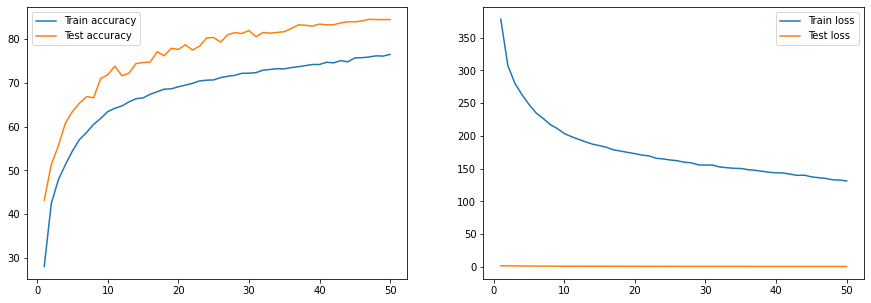

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_5.plot_accuracy()
plt.subplot(122)
model_5.plot_loss()
plt.savefig('images/model_5.png')
plt.show()

In [6]:
max(model_5.train_accuracy), max(model_5.test_accuracy)

(76.538, 84.54)

### Visualizing incorrect predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

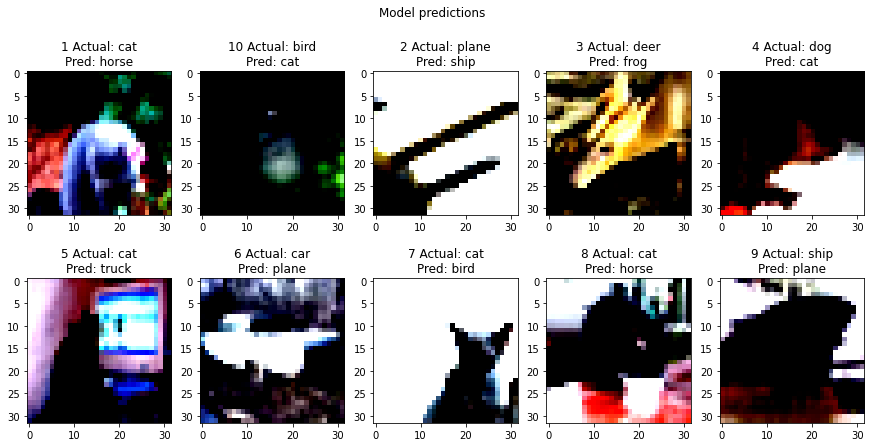

In [9]:
label_mapper = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images, actual, pred = model_5.get_incorrect_pred(device, test_loader)
images, actual, pred = images.to('cpu'), actual.to('cpu'), pred.to('cpu')
labels = [str(indx + 1) + ' Actual: %s' % label_mapper[act.item()] + '\n' + \
    'Pred: %s' % label_mapper[pr.item()] for indx, (act, pr) in enumerate(zip(actual, pred))]
utils.visualize_images(images, labels, n_cols=5, figsize=(15, 7), img_title='Model predictions')